# 'trend_corr_analytic.ipynb'

### 📋 분석 목표
- **User_Goal_1**: 서울, 경기, 인천 광역시의 부동산 가격 변동 패턴을 비교 분석하고, 지역별 시장 특성과 투자 매력도를 평가
- **User_Goal_2**: 전용면적별(소형, 중형, 대형) 아파트의 가격 변동 추이를 분석하고, 생애주기에 따른 최적 투자 전략과 거주 전략을 데이터 기반으로 제시
- **User_Goal_3**: 부동산 거래량 변화가 가격 변동에 미치는 영향을 시차 분석을 통해 파악하고, 시장 전환점을 예측할 수 있는 지표를 개발

### 📁 데이터
- **파일명**: combined_seoul_apt_sales_20250821.csv
-- / /Users/jaehyuntak/Desktop/pjt-data-analysis/raw_data/combined_seoul_apt_sales_20250821.csv
- **기간**: 
- **대상**: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from sklearn.feature_selection import mutual_info_regression

## 한글 폰트 설정
import sys
import os
sys.path.append('/Users/jaehyuntak/Desktop/pjt-data-analysis')
from da_utils.font import setup_korean_font
setup_korean_font()



from da_utils.serial_data_cleaning import load_data

--- 한글 폰트 설정 시작 ---
운영체제: Darwin
기본 폰트로 'AppleGothic'를 사용합니다.
✅ 성공: 'AppleGothic' 폰트를 설정했습니다.
--- 한글 폰트 설정 종료 ---
--- 한글 폰트 설정 시작 ---
운영체제: Darwin
기본 폰트로 'AppleGothic'를 사용합니다.
✅ 성공: 'AppleGothic' 폰트를 설정했습니다.
--- 한글 폰트 설정 종료 ---
✅ serial_data_cleaning 모듈이 성공적으로 로드되었습니다.
📋 사용 가능한 함수 목록:
   - load_data()
   - analyze_missing_values()
   - replace_dash_with_nan()
   - process_date_columns()
   - classify_transaction_status()
   - (추가 예정...)


In [2]:
# 데이터 로드
file_path = '/Users/jaehyuntak/Desktop/pjt-data-analysis/raw_data/combined_seoul_apt_sales_20250821.csv'
df_seoul_10_sales = pd.read_csv(file_path, encoding='utf-8')


df_test = load_data(file_path)  # 새로운 함수 방식

🔍 데이터 로드 완료
📁 파일 경로: /Users/jaehyuntak/Desktop/pjt-data-analysis/raw_data/combined_seoul_apt_sales_20250821.csv
📊 데이터 크기: 692,583행 × 20열
💾 메모리 사용량: 525.82 MB

📋 데이터 타입 정보
NO            int64
시군구          object
번지           object
본번            int64
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
동            object
층             int64
매수자          object
매도자          object
건축년도          int64
도로명          object
해제사유발생일      object
거래유형         object
중개사소재지       object
등기일자         object
dtype: object

🔢 각 컬럼별 고유값 개수
   NO: 692,583개
   시군구: 339개
   번지: 6,557개
   본번: 1,537개
   부번: 326개
   단지명: 7,778개
   전용면적(㎡): 13,993개
   계약년월: 121개
   계약일: 31개
   거래금액(만원): 8,289개
   동: 1,411개
   층: 72개
   매수자: 5개
   매도자: 5개
   건축년도: 62개
   도로명: 9,159개
   해제사유발생일: 1,638개
   거래유형: 3개
   중개사소재지: 2,028개
   등기일자: 644개

📈 숫자형 컬럼 기본 통계
                  NO             본번             부번        전용면적(㎡)  \
count  692583.000000  692583

In [3]:
# 2번째 함수 테스트
from da_utils.serial_data_cleaning import analyze_missing_values

# 테스트 실행
missing_info = analyze_missing_values(df_test)

# 결과 확인
print(f"\n🧪 테스트 결과:")
print(f"   명시적 결측치: {missing_info['total_nulls']}개")
print(f"   암묵적 결측치: {missing_info['total_dashes']}개")
print(f"   총 결측치: {missing_info['total_missing']}개")

🔍 결측치 분석

📊 명시적 결측치(NaN) 분석
------------------------------
✅ 명시적 결측치가 없습니다.

📊 암묵적 결측치('-' 문자) 분석
------------------------------
               개수  비율(%)
해제사유발생일  678722.0  98.00
동        585469.0  84.53
매수자      583689.0  84.28
매도자      583689.0  84.28
등기일자     575702.0  83.12
중개사소재지   542258.0  78.30
거래유형     532607.0  76.90

📋 결측치 요약
------------------------------
   전체 데이터: 692,583건
   명시적 결측치(NaN): 0개
   암묵적 결측치('-'): 4,082,136개
   총 결측치: 4,082,136개

🧪 테스트 결과:
   명시적 결측치: 0개
   암묵적 결측치: 4082136개
   총 결측치: 4082136개


In [4]:
# 3번째 함수 테스트
from da_utils.serial_data_cleaning import replace_dash_with_nan

df_clean = replace_dash_with_nan(df_test)
print(f"원본 shape: {df_test.shape}")
print(f"변환 후 shape: {df_clean.shape}")

🔧 '-' 문자를 NaN으로 변환
   해제사유발생일: 678,722개 '-' → 678,722개 NaN
   매수자: 583,689개 '-' → 583,689개 NaN
   매도자: 583,689개 '-' → 583,689개 NaN
   동: 585,469개 '-' → 585,469개 NaN
   등기일자: 575,702개 '-' → 575,702개 NaN
   중개사소재지: 542,258개 '-' → 542,258개 NaN
원본 shape: (692583, 20)
변환 후 shape: (692583, 20)


In [5]:
# 4번째 함수 테스트
from da_utils.serial_data_cleaning import process_date_columns

df_with_dates = process_date_columns(df_clean)
print(f"날짜 처리 전 컬럼 수: {len(df_clean.columns)}")
print(f"날짜 처리 후 컬럼 수: {len(df_with_dates.columns)}")
print(f"계약날짜 타입: {df_with_dates['계약날짜'].dtype}")

📅 날짜 컬럼 처리
   ✅ 계약날짜 생성 (계약년월 + 계약일)
      기간: 2015-08-20 00:00:00 ~ 2025-08-18 00:00:00
   ✅ 등기일자 datetime 변환
      변환 성공: 116,881건
      변환 실패 또는 원래 NaN: 575,702건

   📋 처리 후 컬럼 수: 21개
날짜 처리 전 컬럼 수: 20
날짜 처리 후 컬럼 수: 21
계약날짜 타입: datetime64[ns]


In [6]:
# 5번째 함수 테스트
from da_utils.serial_data_cleaning import classify_transaction_status

df_with_status = classify_transaction_status(df_with_dates)
print(f"거래상태 분류 완료!")
print(f"새로 추가된 컬럼: 거래상태")
print(df_with_status['거래상태'].value_counts())

🏷️ 거래상태 분류
📊 거래상태별 분포:
   - 진행중: 561,841건 (81.1%)
   - 정상완료: 116,881건 (16.9%)
   - 해제: 13,861건 (2.0%)

📋 거래상태별 주요 필드 결측률:
          동   등기일자  해제사유발생일   매수자  중개사소재지
거래상태                                     
정상완료    8.4    0.0    100.0  29.1     5.3
진행중   100.0  100.0    100.0  96.6    94.5
해제    100.0  100.0      0.0  49.9    37.5
거래상태 분류 완료!
새로 추가된 컬럼: 거래상태
거래상태
진행중     561841
정상완료    116881
해제       13861
Name: count, dtype: int64


In [7]:
# 6번째 함수 테스트
from da_utils.serial_data_cleaning import filter_normal_transactions

df_normal = filter_normal_transactions(df_with_status)
print(f"정상거래 필터링 완료!")
print(f"거래금액 타입: {df_normal['거래금액(만원)'].dtype}")
print(f"거래금액 샘플: {df_normal['거래금액(만원)'].head().tolist()}")

✅ 정상거래 필터링 및 데이터 변환
📊 데이터 필터링 결과:
   원본 데이터: 692,583건
   정상완료 거래: 116,881건 (16.9%)
   제외된 거래: 575,702건

📋 정상완료 거래의 특성:
   기간: 2023-01-01 ~ 2025-08-13
   평균 거래가격: 117,037만원
   평균 전용면적: 75.3㎡

📍 지역별 정상완료 거래 분포:
   - 서울특별시: 116,881건 (100.0%)
정상거래 필터링 완료!
거래금액 타입: int64
거래금액 샘플: [119000, 81000, 148200, 69500, 95000]


In [8]:
# 전체 파이프라인 테스트
# from da_utils.serial_data_cleaning import clean_all_data

# ## 파일명 자동 생성 : 'cleaned_normal_transactions_{timestamp}.csv'

# file_path = '/Users/jaehyuntak/Desktop/pjt-data-analysis/raw_data/combined_seoul_apt_sales_20250821.csv'
# output_path = '/Users/jaehyuntak/Desktop/pjt-data-analysis/processed_data/'

# # 한 번에 전체 정제 실행!
# df_result = clean_all_data(file_path, output_path)
# print(f"🎯 최종 결과: {df_result.shape}")

In [9]:
df_seoul_10_normal_sales= df_normal

In [10]:
# 분석 재시작
## 함수를 위한 df 변수명 맞추기
df = df_seoul_10_normal_sales
## import 2 
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression

import datetime as dt

# 상관관계 분석
from scipy.stats import pearsonr, spearmanr, kendalltau

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116881 entries, 544711 to 692582
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   NO        116881 non-null  int64         
 1   시군구       116881 non-null  object        
 2   번지        116881 non-null  object        
 3   본번        116881 non-null  int64         
 4   부번        116881 non-null  int64         
 5   단지명       116881 non-null  object        
 6   전용면적(㎡)   116881 non-null  float64       
 7   계약년월      116881 non-null  int64         
 8   계약일       116881 non-null  int64         
 9   거래금액(만원)  116881 non-null  int64         
 10  동         107114 non-null  object        
 11  층         116881 non-null  int64         
 12  매수자       82923 non-null   object        
 13  매도자       82923 non-null   object        
 14  건축년도      116881 non-null  int64         
 15  도로명       116881 non-null  object        
 16  해제사유발생일   0 non-null       object     

In [12]:
numeric_stats = df.describe()
numeric_stats

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,등기일자,계약날짜
count,116881.000000,116881.000000,116881.000000,116881.000000,116881.000000,116881.000000,1.168810e+05,116881.000000,116881.000000,116881,116881
mean,616214.278197,623.003243,4.419033,75.279581,202401.096739,15.833686,1.170368e+05,9.856940,2003.377683,2024-08-08 09:16:50.966710016,2024-05-21 06:20:46.868182272
min,544712.000000,1.000000,0.000000,10.780000,202301.000000,1.000000,6.950000e+03,-3.000000,1961.000000,2023-01-02 00:00:00,2023-01-01 00:00:00
25%,578751.000000,225.000000,0.000000,59.760000,202310.000000,8.000000,6.450000e+04,5.000000,1996.000000,2024-01-05 00:00:00,2023-10-16 00:00:00
50%,609434.000000,504.000000,0.000000,78.553200,202406.000000,16.000000,9.400000e+04,9.000000,2003.000000,2024-09-20 00:00:00,2024-06-23 00:00:00
75%,660098.000000,820.000000,0.000000,84.960000,202412.000000,23.000000,1.420000e+05,14.000000,2013.000000,2025-03-07 00:00:00,2024-12-24 00:00:00
max,692583.000000,4974.000000,2837.000000,309.700000,202508.000000,31.000000,2.500000e+06,68.000000,2025.000000,2025-08-14 00:00:00,2025-08-13 00:00:00
std,44958.179394,628.231083,37.668679,28.993266,71.950944,8.639529,8.812303e+04,6.512738,11.354334,NaN,NaN


--- 파생 변수 생성 시작 ---
--- 파생 변수 생성 완료 ---
        거래금액(만원)  전용면적(㎡)    단위면적당거래금액  건축년도       계약날짜  건축경과년수
544711    119000  84.9800  1400.329489  2014 2023-08-19       9
544712     81000  84.4950   958.636606  1996 2023-08-19      27
544713    148200  59.7547  2480.139638  2017 2023-08-19       6
544714     69500  84.9700   817.935742  2003 2023-08-19      20
544715     95000  59.9400  1584.918252  2003 2023-08-19      20
=== 기본 상관관계 분석 시작 ===


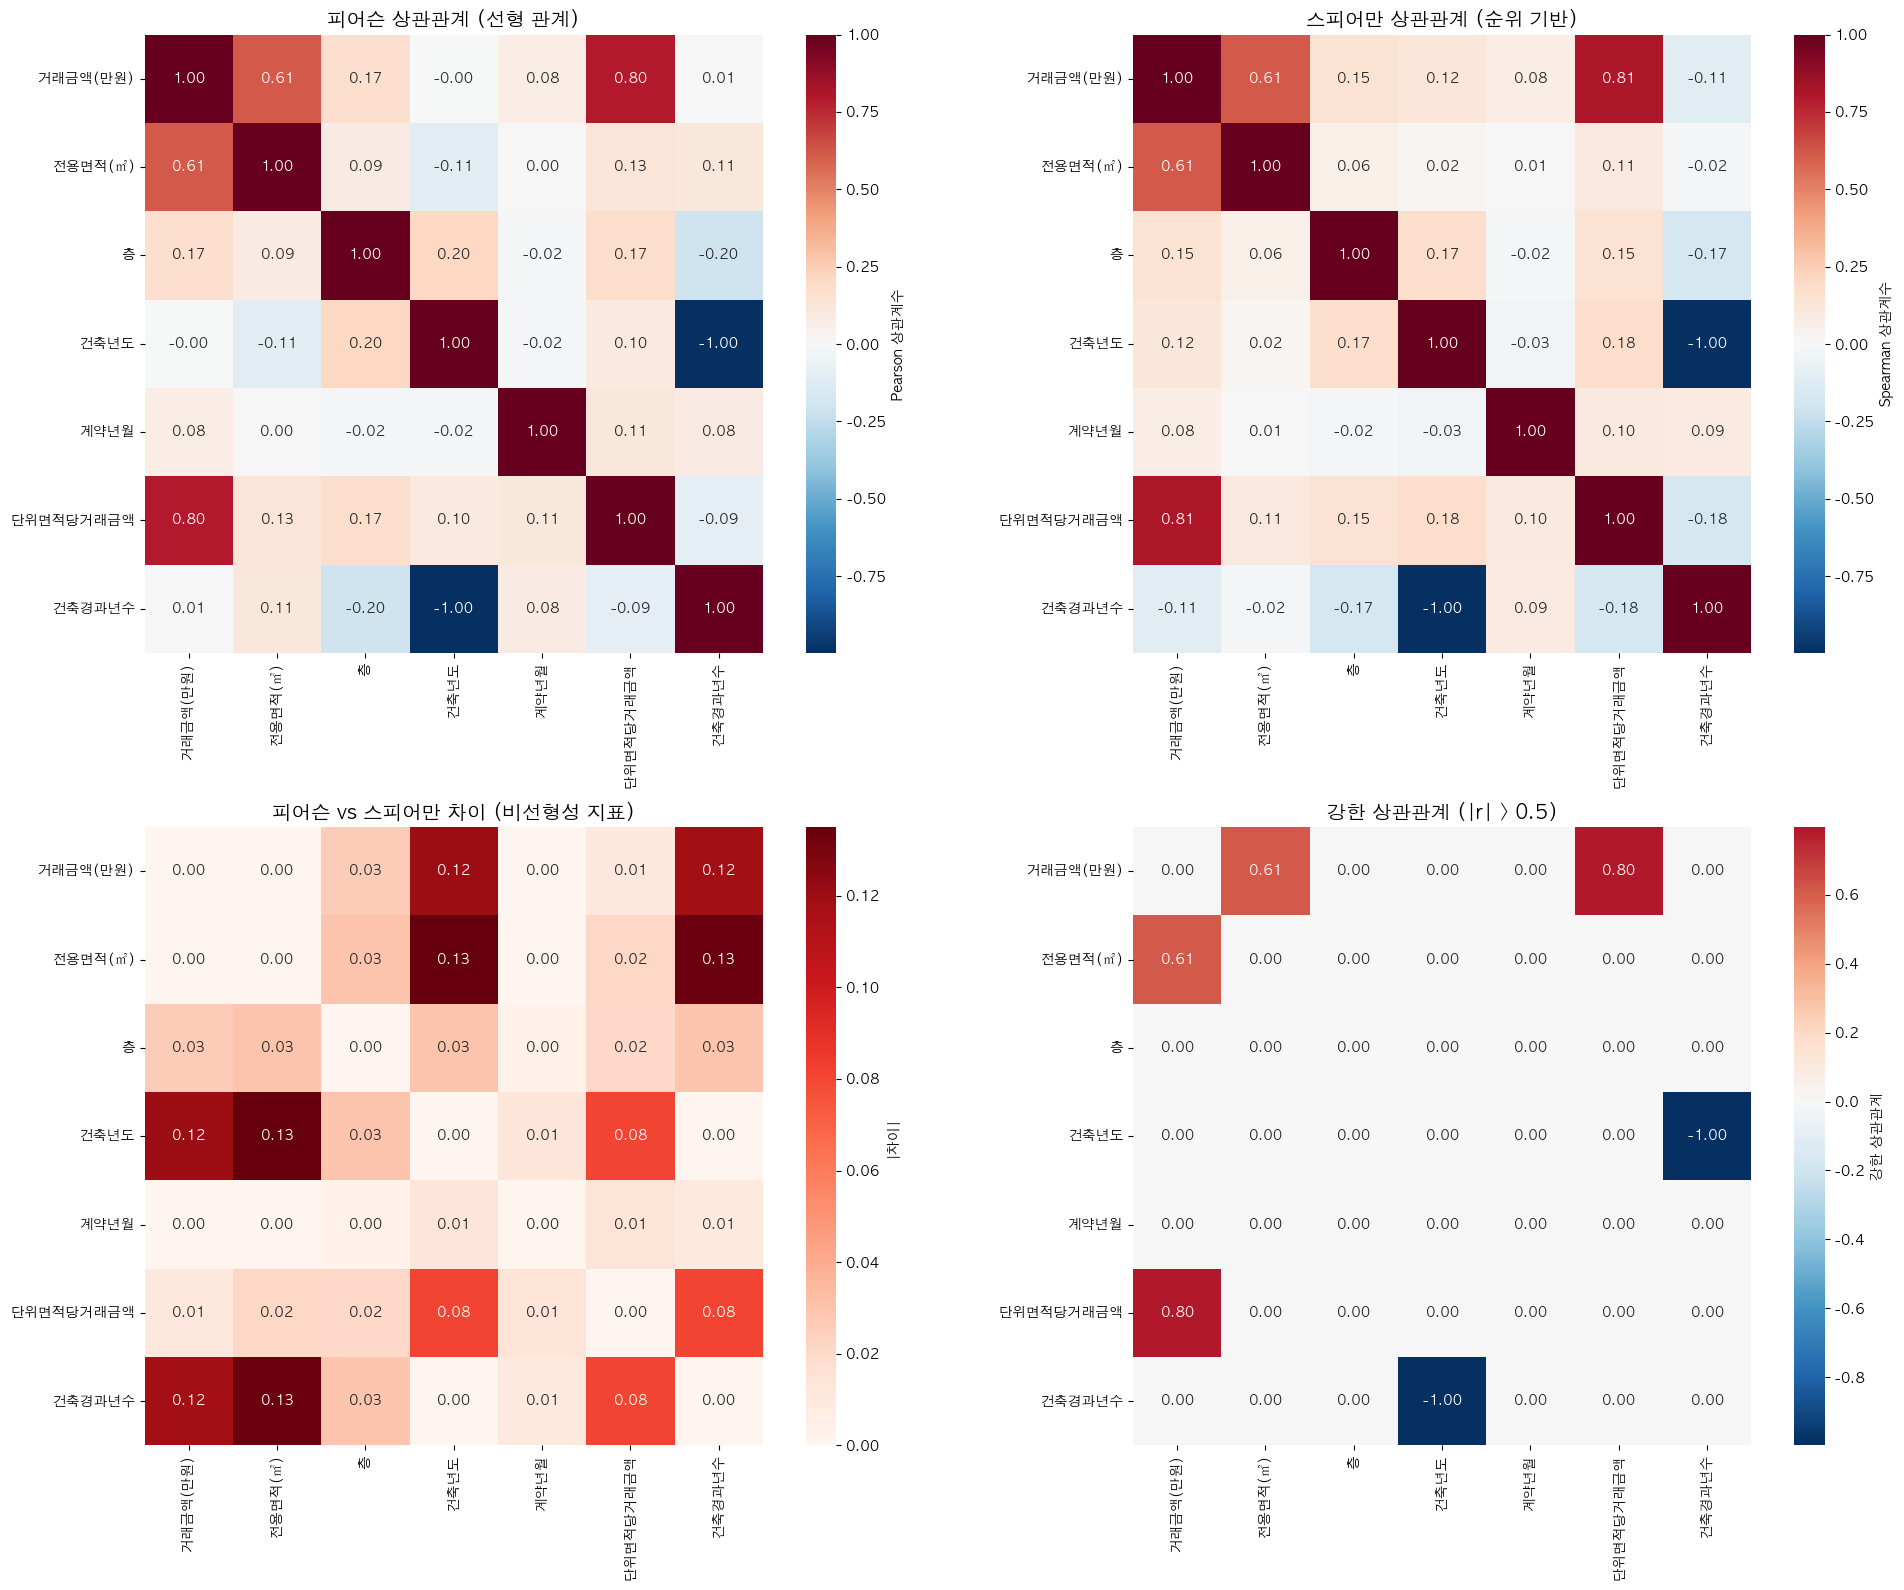

=== 기본 상관관계 분석 완료 ===

--- 기본 상관관계 분석 결과 검증 ---

피어슨 상관계수 (상위 5개):
          거래금액(만원)   전용면적(㎡)         층      건축년도      계약년월  단위면적당거래금액  \
거래금액(만원)  1.000000  0.613959  0.171326 -0.001360  0.078899   0.796927   
전용면적(㎡)   0.613959  1.000000  0.085706 -0.114741  0.004671   0.126747   
층         0.171326  0.085706  1.000000  0.204028 -0.016043   0.172763   
건축년도     -0.001360 -0.114741  0.204028  1.000000 -0.017899   0.102187   
계약년월      0.078899  0.004671 -0.016043 -0.017899  1.000000   0.110827   

            건축경과년수  
거래금액(만원)  0.006372  
전용면적(㎡)   0.114665  
층        -0.204380  
건축년도     -0.997945  
계약년월      0.081873  

스피어만 상관계수 (상위 5개):
          거래금액(만원)   전용면적(㎡)         층      건축년도      계약년월  단위면적당거래금액  \
거래금액(만원)  1.000000  0.614282  0.145308  0.118502  0.078542   0.808192   
전용면적(㎡)   0.614282  1.000000  0.055917  0.020231  0.005165   0.105862   
층         0.145308  0.055917  1.000000  0.174356 -0.019203   0.152358   
건축년도      0.118502  0.020231  0.174356  1.000000 -0.0308

In [13]:
# 코드 블록 1: 파생 변수 생성 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 특화된 파생 변수 생성
# 이 부분은 ipynb에서 직접 정의하고 테스트합니다.
print("--- 파생 변수 생성 시작 ---")
df['단위면적당거래금액'] = df['거래금액(만원)'] / df['전용면적(㎡)']
df['건축경과년수'] = df['계약날짜'].dt.year - df['건축년도']
print("--- 파생 변수 생성 완료 ---")
print(df[['거래금액(만원)', '전용면적(㎡)', '단위면적당거래금액', '건축년도', '계약날짜', '건축경과년수']].head())


# 코드 블록 2: da_utils/correlation 모듈에서 analyze_basic_correlations 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_basic_correlations

# 코드 블록 3: analyze_basic_correlations 함수 호출 및 결과 검증 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 맞는 numeric_cols 정의
numeric_cols_for_basic_corr = [
    '거래금액(만원)', '전용면적(㎡)', '층', '건축년도', '계약년월',
    '단위면적당거래금액', '건축경과년수'
]

# 함수 실행
pearson_corr_df, spearman_corr_df, corr_diff_df, strong_corr_df = \
    analyze_basic_correlations(df=df, numeric_cols=numeric_cols_for_basic_corr)

# 결과 검증 (TDD "Green" 단계)
print("\n--- 기본 상관관계 분석 결과 검증 ---")
print("\n피어슨 상관계수 (상위 5개):")
print(pearson_corr_df.head())
print("\n스피어만 상관계수 (상위 5개):")
print(spearman_corr_df.head())
print("\n상관계수 차이 (상위 5개):")
print(corr_diff_df.head())
print("\n강한 상관관계 (상위 5개):")
print(strong_corr_df.head())

# 추가적인 검증 로직 (예: 특정 컬럼 간의 상관계수 값 확인)
# assert pearson_corr_df.loc['거래금액(만원)', '전용면적(㎡)'] > 0.5, "거래금액과 전용면적의 피어슨 상관계수가 예상보다 낮습니다."
# print("기본 상관관계 분석 결과가 예상대로 동작합니다.")

In [14]:
# --- TDD 계속: 두 번째 기능 검증 (켄달 타우) ---

# 코드 블록 4: da_utils/correlation 모듈에서 analyze_kendall_tau 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_kendall_tau

# 코드 블록 5: analyze_kendall_tau 함수 호출 및 결과 검증 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 맞는 key_vars 정의
key_vars_for_kendall = [
    '거래금액(만원)', '전용면적(㎡)', '층', '건축년도',
    '단위면적당거래금액', '건축경과년수'
]

# 함수 실행
kendall_results_dict = analyze_kendall_tau(df=df, key_vars=key_vars_for_kendall)

# 결과 검증 (TDD "Green" 단계)
print("\n--- 켄달 타우 상관관계 분석 결과 검증 ---")
if kendall_results_dict:
    print(f"총 {len(kendall_results_dict)}개의 유의미한 켄달 타우 관계가 발견되었습니다.")
    # 예시: 특정 관계의 tau 값 확인
    # if '거래금액(만원) vs 전용면적(㎡)' in kendall_results_dict:
    #     print(f"거래금액(만원) vs 전용면적(㎡) tau: {kendall_results_dict['거래금액(만원) vs 전용면적(㎡)']['tau']:.3f}")
else:
    print("켄달 타우 분석에서 유의미한 관계가 발견되지 않았습니다.")

# 추가적인 검증 로직 (예: 딕셔너리 구조 확인, 특정 값 범위 확인)
# assert isinstance(kendall_results_dict, dict), "반환된 결과가 딕셔너리 형태가 아닙니다."
# print("켄달 타우 분석 결과가 예상대로 동작합니다.")


=== 켄달 타우 상관계수 분석 시작 ===
  유의미한 켄달 타우 상관관계 결과:
    거래금액(만원) vs 전용면적(㎡) = 0.448 (p=0.000)
    거래금액(만원) vs 층 = 0.100 (p=0.000)
    거래금액(만원) vs 단위면적당거래금액 = 0.627 (p=0.000)
    층 vs 건축년도 = 0.122 (p=0.000)
    층 vs 단위면적당거래금액 = 0.105 (p=0.000)
    층 vs 건축경과년수 = -0.122 (p=0.000)
    건축년도 vs 단위면적당거래금액 = 0.125 (p=0.000)
    건축년도 vs 건축경과년수 = -0.975 (p=0.000)
    단위면적당거래금액 vs 건축경과년수 = -0.119 (p=0.000)
=== 켄달 타우 상관계수 분석 완료 ===

--- 켄달 타우 상관관계 분석 결과 검증 ---
총 9개의 유의미한 켄달 타우 관계가 발견되었습니다.


In [15]:
# trend_corr_analytic.ipynb

# ... (이전 코드 블록: 데이터 로드, 전처리, 한글 폰트 설정, import 2, 파생 변수 생성,
#       analyze_basic_correlations 테스트, analyze_kendall_tau 테스트) ...
# df = df_seoul_10_normal_sales 에 파생변수까지 추가된 상태라고 가정합니다.

# --- TDD 계속: 세 번째 기능 검증 (상호 정보량) ---

# 코드 블록 6: da_utils/correlation 모듈에서 analyze_mutual_information 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_mutual_information

# 코드 블록 7: analyze_mutual_information 함수 호출 및 결과 검증 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 맞는 key_vars 및 target_col 정의
# 켄달 타우에서 사용했던 key_vars를 재활용하거나, 필요에 따라 새로 정의할 수 있습니다.
key_vars_for_mi = [
    '거래금액(만원)', '전용면적(㎡)', '층', '건축년도',
    '단위면적당거래금액', '건축경과년수'
]
target_col_for_mi = '거래금액(만원)' # 기능 명세서에 따라 Monetary 대신 '거래금액(만원)' 사용

# 함수 실행
mi_results_df = analyze_mutual_information(df=df, target_col=target_col_for_mi, key_vars=key_vars_for_mi)

# 결과 검증 (TDD "Green" 단계)
print("\n--- 상호 정보량 분석 결과 검증 ---")
if not mi_results_df.empty:
    print(f"상호 정보량 점수 (타겟: {target_col_for_mi}):")
    print(mi_results_df)
    # 예시: 가장 높은 MI 점수를 가진 Feature 확인
    # print(f"가장 높은 MI 점수를 가진 Feature: {mi_results_df.iloc[0]['Feature']}")
else:
    print("상호 정보량 분석 결과가 없습니다.")

# 추가적인 검증 로직 (예: DataFrame 구조 확인, MI_Score가 0 이상인지 확인)
# assert isinstance(mi_results_df, pd.DataFrame), "반환된 결과가 DataFrame 형태가 아닙니다."
# assert all(mi_results_df['MI_Score'] >= 0), "MI_Score에 음수 값이 포함되어 있습니다."
# print("상호 정보량 분석 결과가 예상대로 동작합니다.")


=== 상호 정보량 기반 연관성 분석 시작 ===
경고: 다음 Feature 컬럼들이 데이터프레임에 없거나 타겟 컬럼과 동일합니다: ['거래금액(만원)']. 이 컬럼들은 분석에서 제외됩니다.
  (타겟: 거래금액(만원) 기준)
  단위면적당거래금액: 3.206
  전용면적(㎡): 0.786
  건축년도: 0.332
  건축경과년수: 0.283
  층: 0.039
=== 상호 정보량 기반 연관성 분석 완료 ===

--- 상호 정보량 분석 결과 검증 ---
상호 정보량 점수 (타겟: 거래금액(만원)):
     Feature  MI_Score
0  단위면적당거래금액  3.205969
1    전용면적(㎡)  0.786166
2       건축년도  0.331823
3     건축경과년수  0.283134
4          층  0.038818



--- 비선형 패턴 탐지 분석 시작 ---

=== 비선형 패턴 심화 탐지 시작 ===

  단위면적당거래금액 상위 10% 고객 특성:
  - 평균 전용면적(㎡): 83.5
  - 평균 층: 12.0
  - 평균 건축년도: 2,003.3
  - 시군구 (상위): ['서울특별시 송파구 잠실동', '서울특별시 서초구 반포동', '서울특별시 강남구 개포동'] (비율: [0.11267967145790554, 0.10258384668035592, 0.08273442847364819])


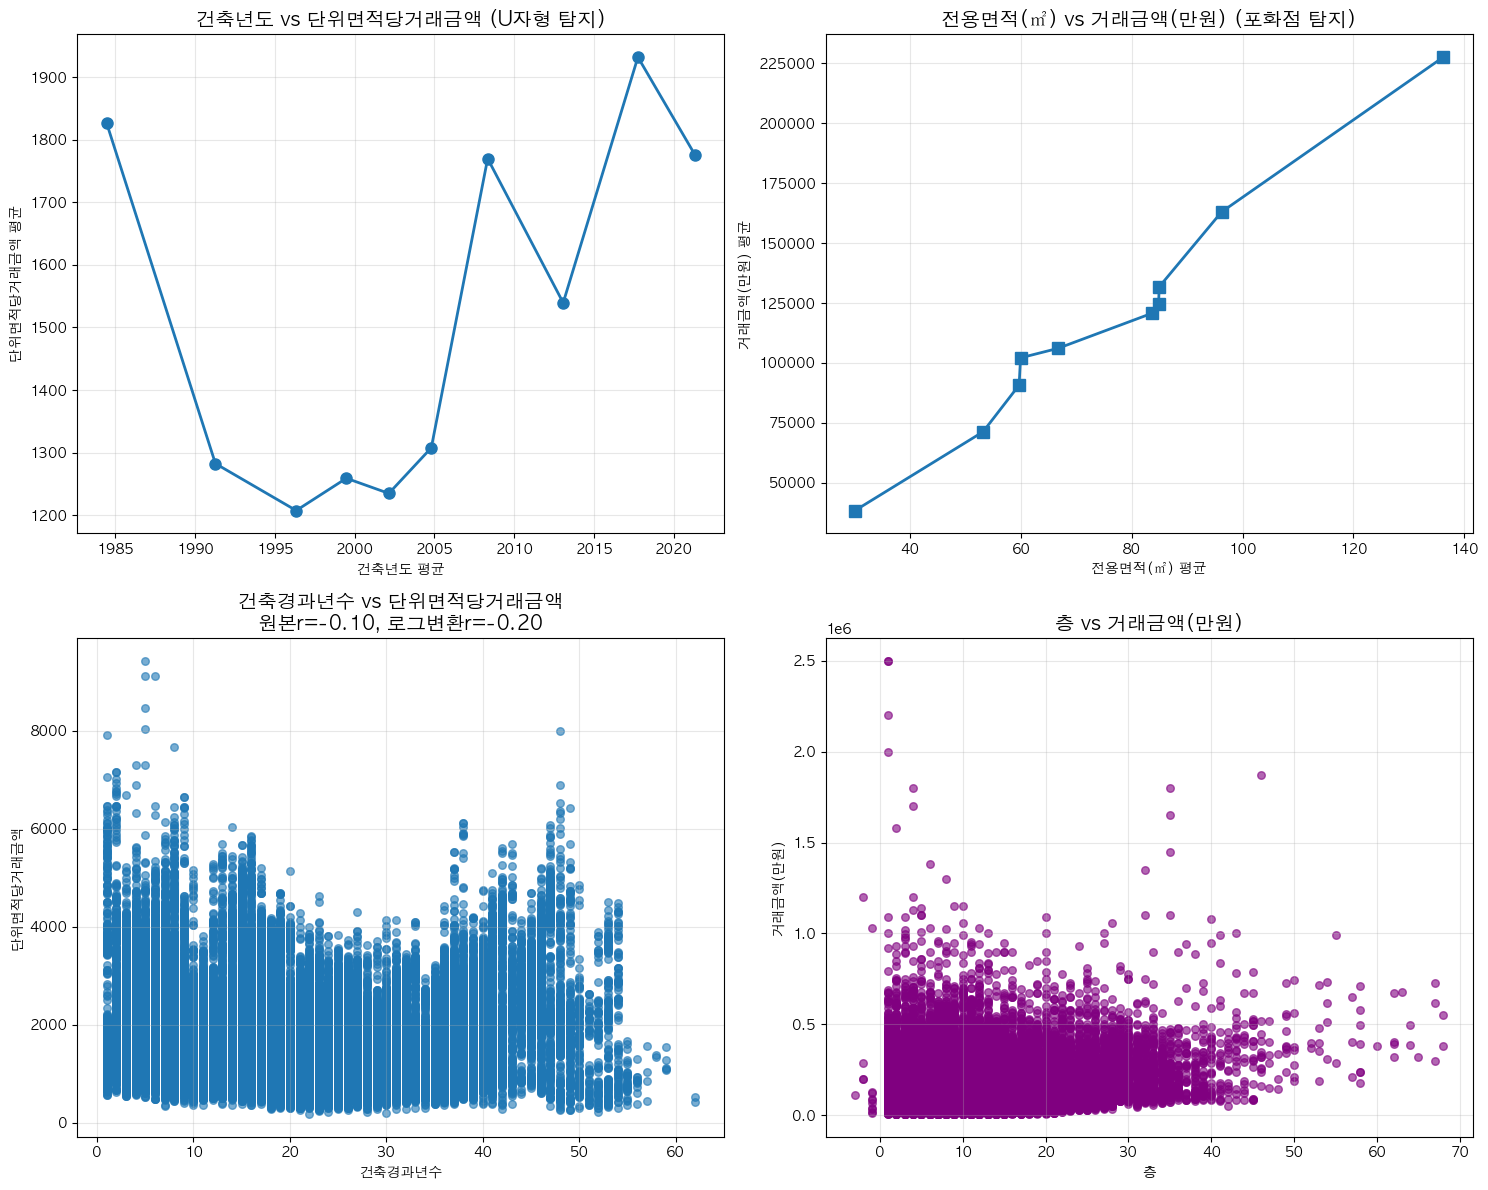

=== 비선형 패턴 심화 탐지 완료 ===
--- 비선형 패턴 탐지 분석 완료 ---


In [16]:
# --- TDD 계속: 네 번째 기능 검증 (비선형 패턴 탐지) ---

# 코드 블록 8: da_utils/correlation 모듈에서 detect_nonlinear_patterns 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import detect_nonlinear_patterns

# 코드 블록 9: detect_nonlinear_patterns 함수 호출 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 맞는 컬럼명들을 파라미터로 전달
print("\n--- 비선형 패턴 탐지 분석 시작 ---")
detect_nonlinear_patterns(
    df=df,
    u_shape_x_col='건축년도',
    u_shape_y_col='단위면적당거래금액',
    saturation_x_col='전용면적(㎡)',
    saturation_y_col='거래금액(만원)',
    exponential_x_col='건축경과년수',
    exponential_y_col='단위면적당거래금액',
    scatter_x_col='층',
    scatter_y_col='거래금액(만원)',
    high_value_segment_col='단위면적당거래금액',
    high_value_analysis_cols=['전용면적(㎡)', '층', '건축년도', '시군구'], # '시군구' 추가하여 범주형 분석도 확인
    q_segments=10,
    quantile_threshold=0.9
)
print("--- 비선형 패턴 탐지 분석 완료 ---")

# 결과 검증 (TDD "Green" 단계)
# 이 함수는 시각화가 주 목적이므로, 시각적 결과와 출력된 텍스트를 통해 검증합니다.
# assert 문으로 특정 플롯이 생성되었는지 직접 검증하기는 어렵지만,
# 출력 메시지나 예상되는 플롯 형태를 육안으로 확인하는 것이 일반적입니다.
# 예를 들어, "오류: 다음 필수 컬럼들이 데이터프레임에 없습니다"와 같은 오류 메시지가 뜨지 않는지 확인합니다.


--- 시계열 추세 분석 시작 ---

--- 월별 거래금액(만원) 추세 분석 ---

=== 시계열 추세 분석 시작 (거래금액(만원) by 계약날짜, M 단위) ===


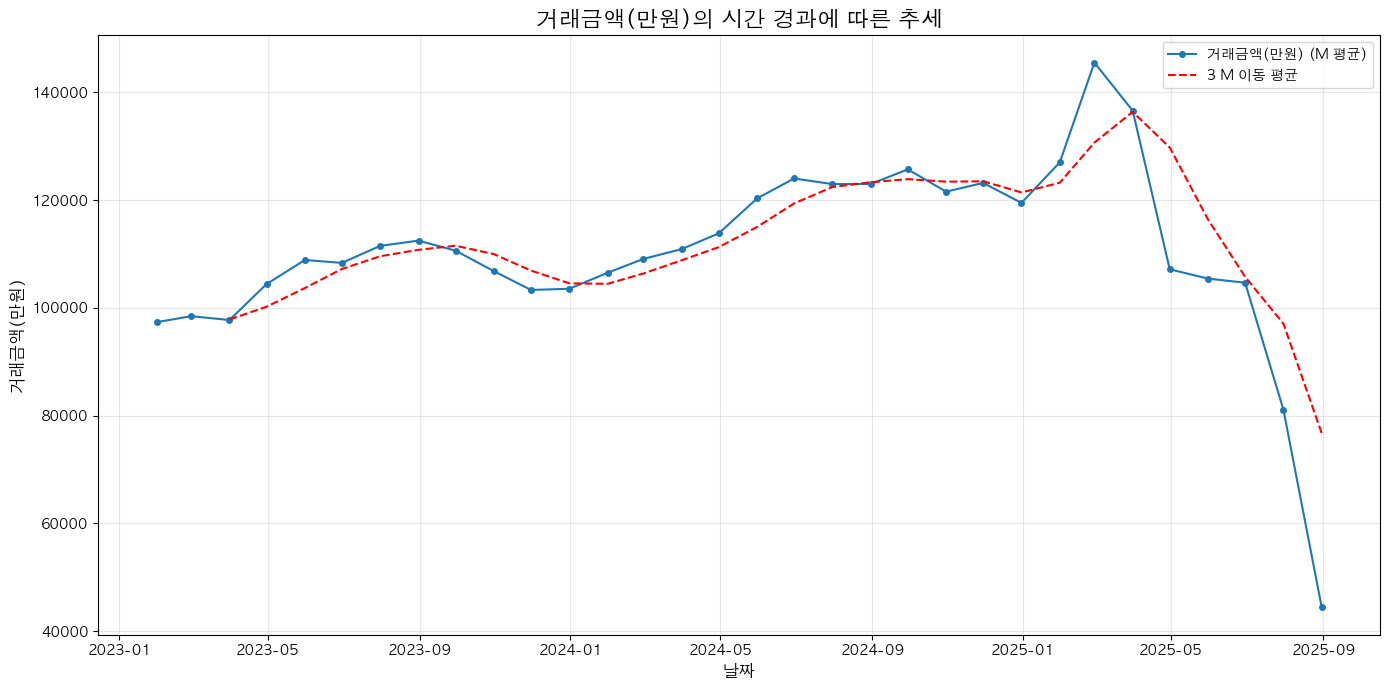

=== 시계열 추세 분석 완료 ===

--- 분기별 단위면적당거래금액 추세 분석 ---

=== 시계열 추세 분석 시작 (단위면적당거래금액 by 계약날짜, Q 단위) ===


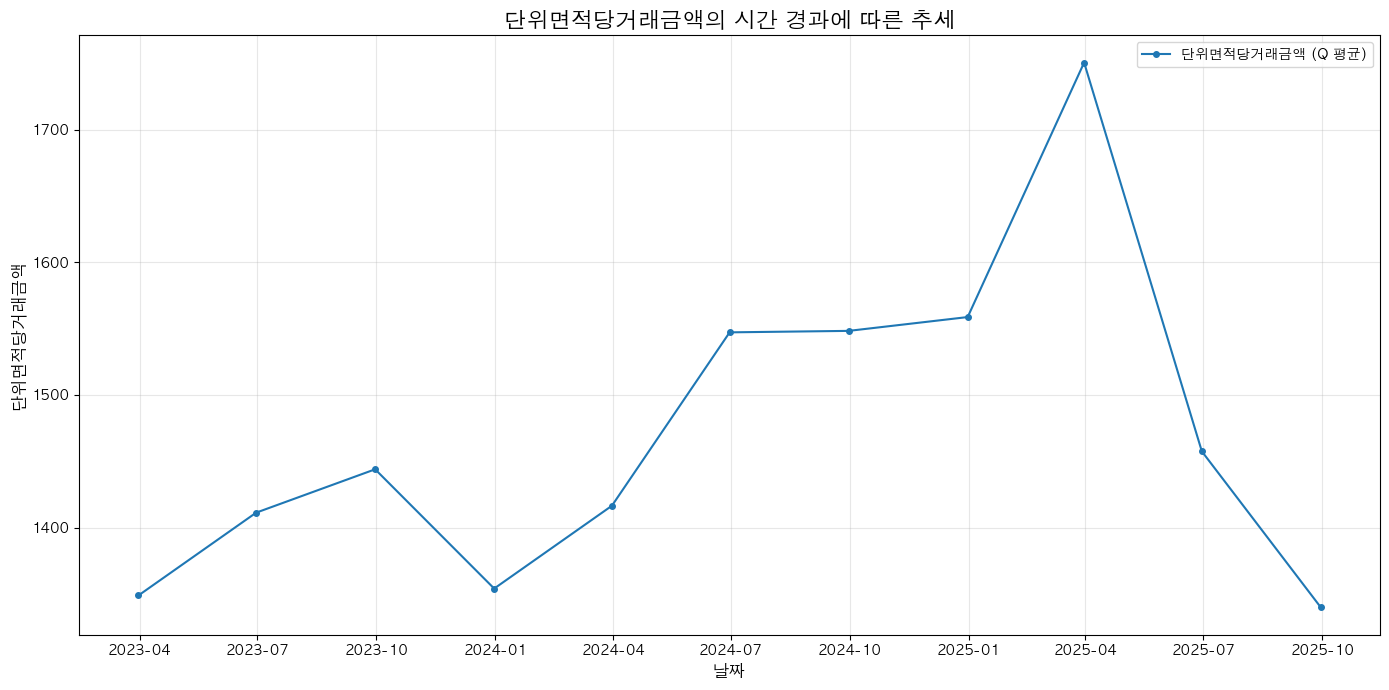

=== 시계열 추세 분석 완료 ===

--- 연도별 거래금액(만원) 추세 분석 ---

=== 시계열 추세 분석 시작 (거래금액(만원) by 계약날짜, Y 단위) ===


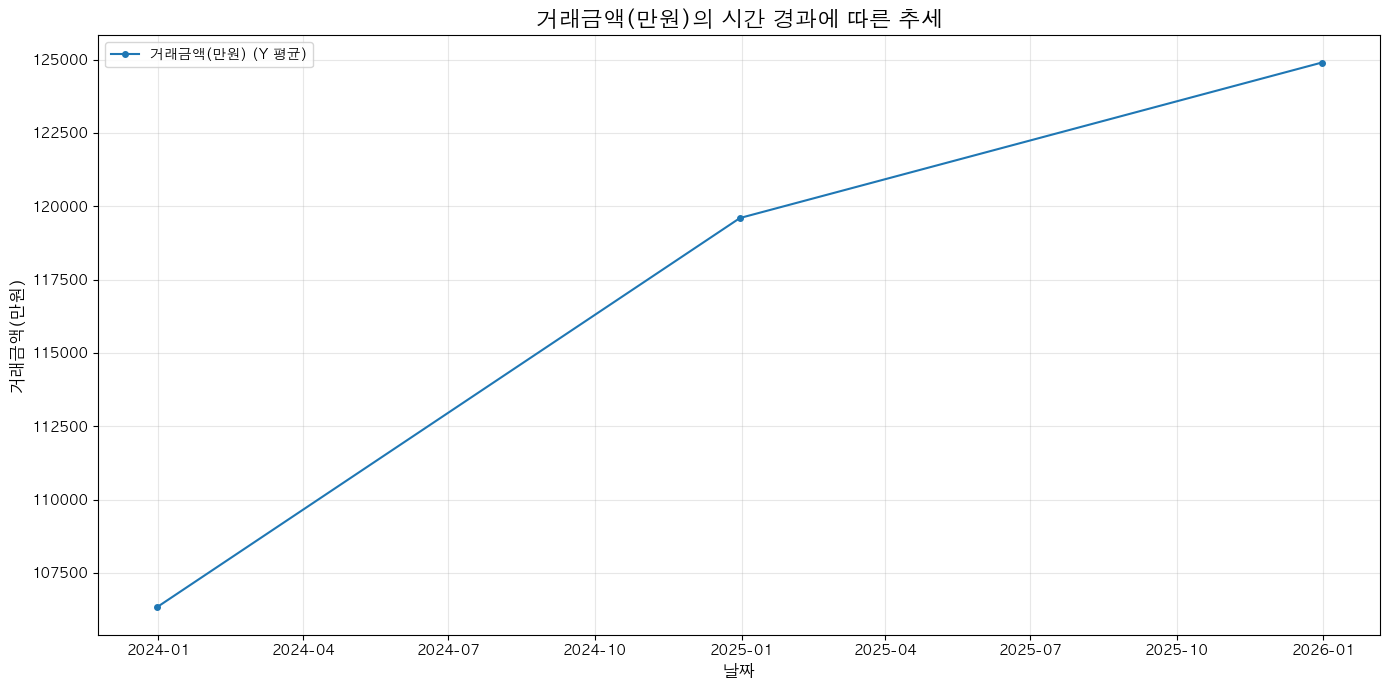

=== 시계열 추세 분석 완료 ===

--- 일별 거래금액(만원) 추세 분석 ---

=== 시계열 추세 분석 시작 (거래금액(만원) by 계약날짜, D 단위) ===


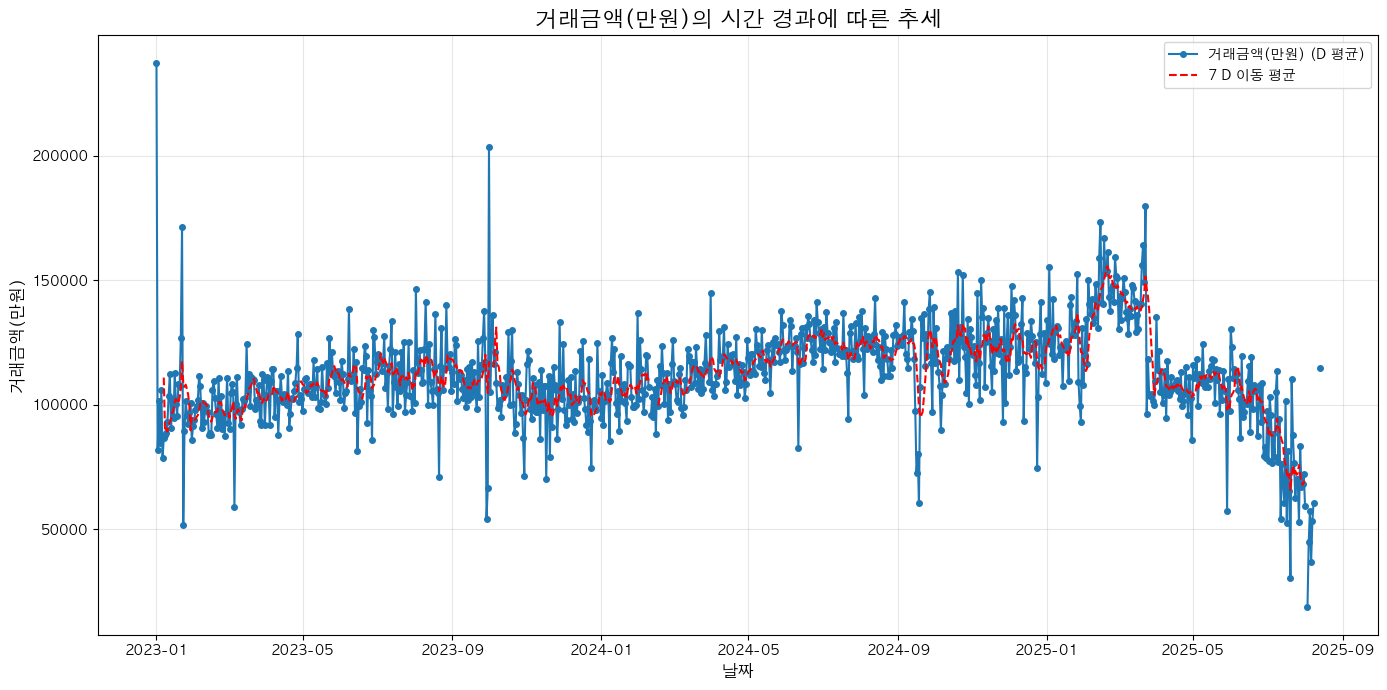

=== 시계열 추세 분석 완료 ===
--- 시계열 추세 분석 완료 ---


In [17]:
# --- TDD 계속: 다섯 번째 기능 검증 (시계열 추세 분석) ---

# 코드 블록 10: da_utils/correlation 모듈에서 analyze_time_series_trend 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_time_series_trend

# 코드 블록 11: analyze_time_series_trend 함수 호출 및 결과 검증 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 맞는 컬럼명들을 파라미터로 전달
print("\n--- 시계열 추세 분석 시작 ---")

# 1. 월별 '거래금액(만원)' 추세 분석 (3개월 이동 평균 포함)
print("\n--- 월별 거래금액(만원) 추세 분석 ---")
analyze_time_series_trend(
    df=df,
    date_col='계약날짜', # '등기일자'도 가능
    value_col='거래금액(만원)',
    resample_freq='M',
    rolling_window=3
)

# 2. 분기별 '단위면적당거래금액' 추세 분석 (이동 평균 없음)
print("\n--- 분기별 단위면적당거래금액 추세 분석 ---")
analyze_time_series_trend(
    df=df,
    date_col='계약날짜',
    value_col='단위면적당거래금액',
    resample_freq='Q',
    rolling_window=None
)

# 3. 연도별 '거래금액(만원)' 추세 분석
print("\n--- 연도별 거래금액(만원) 추세 분석 ---")
analyze_time_series_trend(
    df=df,
    date_col='계약날짜',
    value_col='거래금액(만원)',
    resample_freq='Y'
)

# 4. 일별 '거래금액(만원)' 추세 분석 (데이터가 많을 경우 시각화가 복잡해질 수 있음)
#    일별 분석은 데이터 양이 많을 때 성능 및 가독성 문제가 있을 수 있으므로,
#    특정 기간을 필터링하여 시도하는 것이 좋습니다. 여기서는 전체 기간으로 시도합니다.
print("\n--- 일별 거래금액(만원) 추세 분석 ---")
analyze_time_series_trend(
    df=df,
    date_col='계약날짜',
    value_col='거래금액(만원)',
    resample_freq='D',
    rolling_window=7 # 7일 이동 평균
)

print("--- 시계열 추세 분석 완료 ---")

# 결과 검증 (TDD "Green" 단계)
# 이 함수는 시각화가 주 목적이므로, 생성된 플롯과 출력된 텍스트를 통해 검증합니다.
# 예를 들어, "오류: 날짜 컬럼이 존재하지 않습니다"와 같은 오류 메시지가 뜨지 않는지 확인합니다.


--- 전체 거래금액(만원) 성장률 분석 (그룹 필터링 없음) ---

=== 성장률 분석 시작 (거래금액(만원) by 계약날짜) ===
  그룹 필터링이 요청되지 않았습니다. 모든 그룹을 시각화합니다.

  최근 12개월 평균 MoM 성장률: -14.3%
  최근 12개월 평균 YoY 성장률: 31.7%


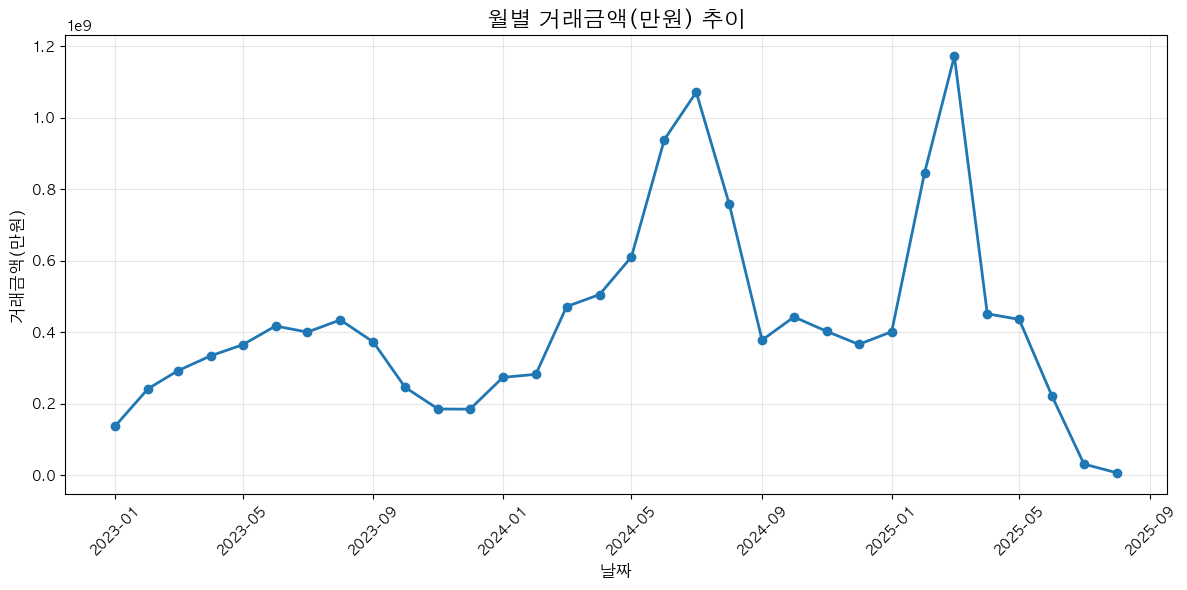

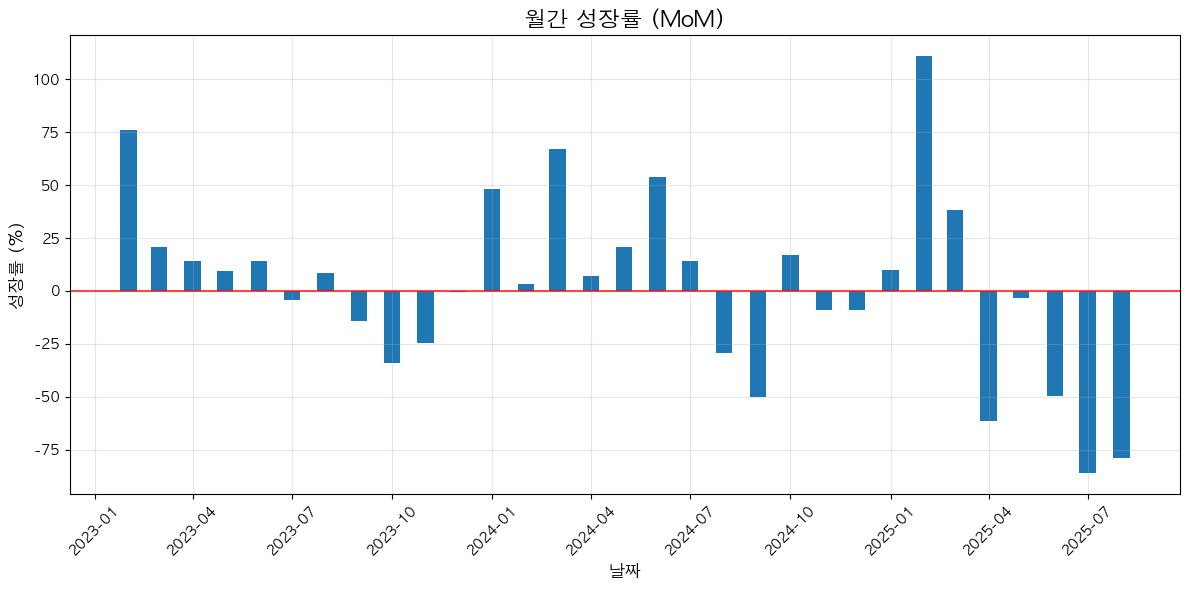

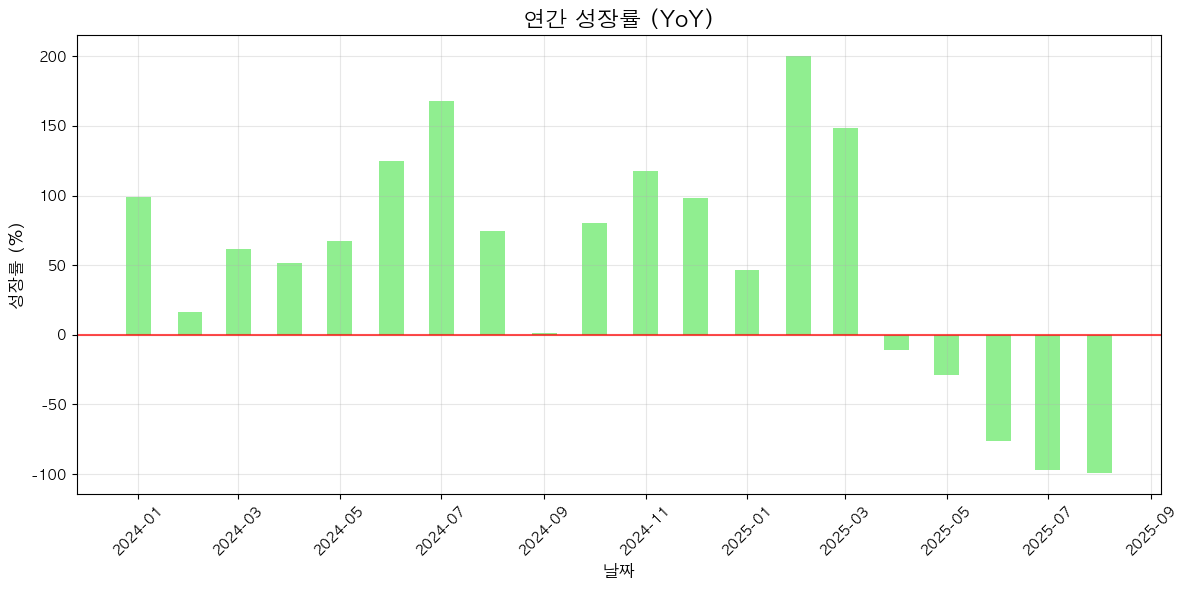

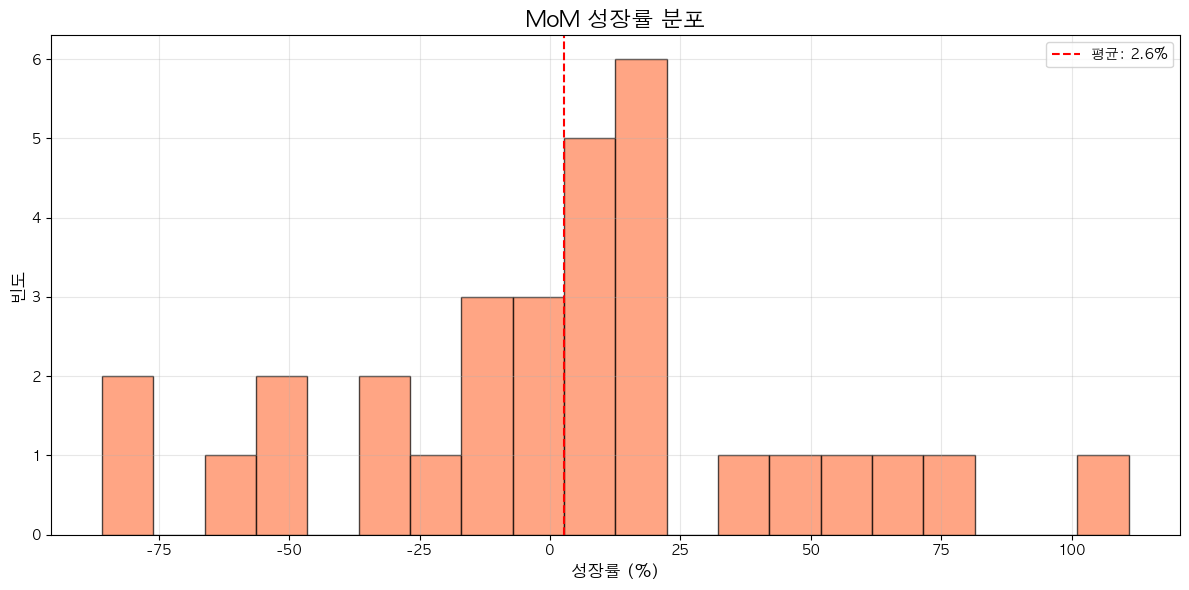

=== 성장률 분석 완료 ===

--- '시군구'별 단위면적당거래금액 성장률 분석 (상위 3개, 하위 3개 그룹) ---

=== 성장률 분석 시작 (단위면적당거래금액 by 계약날짜) ===

  상위 3개 그룹: ['서울특별시 송파구 잠실동', '서울특별시 서초구 반포동', '서울특별시 용산구 서계동']
  하위 3개 그룹: ['서울특별시 중구 장충동2가', '서울특별시 성북구 안암동4가', '서울특별시 종로구 통인동']
  총 6개 그룹만 시각화합니다.

  최근 12개월 평균 성장률 (시각화된 그룹별):
  그룹 (서울특별시 서초구 반포동): MoM=66.3%, YoY=83.2%
  그룹 (서울특별시 성북구 안암동4가): MoM=12.2%, YoY=nan%
  그룹 (서울특별시 송파구 잠실동): MoM=13.8%, YoY=83.6%
  그룹 (서울특별시 용산구 서계동): MoM=nan%, YoY=nan%
  그룹 (서울특별시 종로구 통인동): MoM=-4.3%, YoY=nan%
  그룹 (서울특별시 중구 장충동2가): MoM=35.3%, YoY=nan%


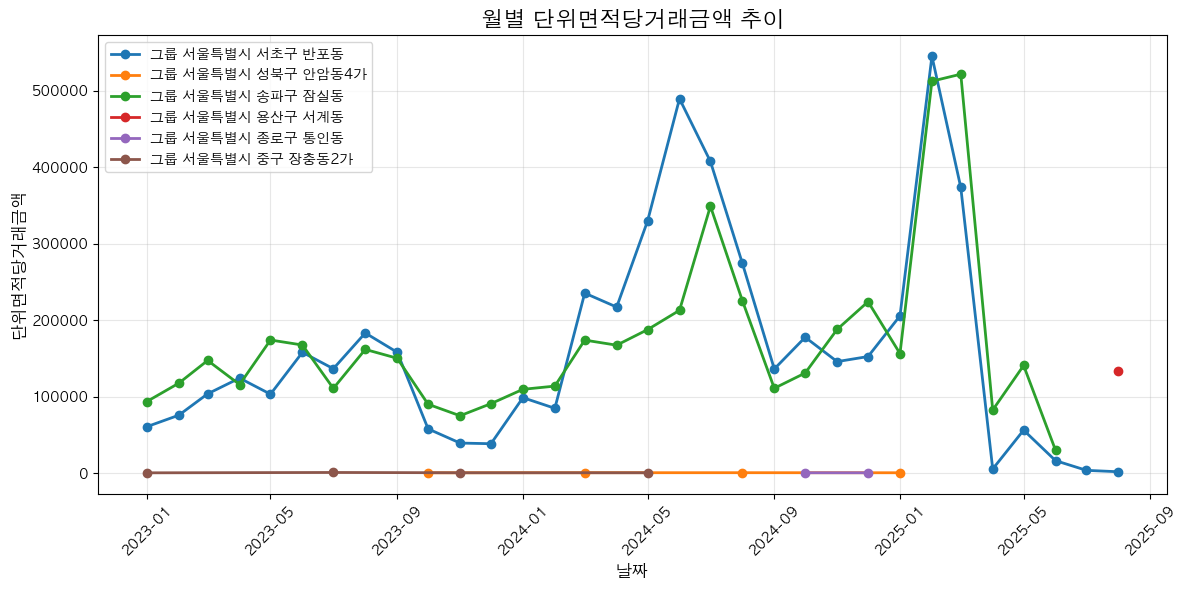

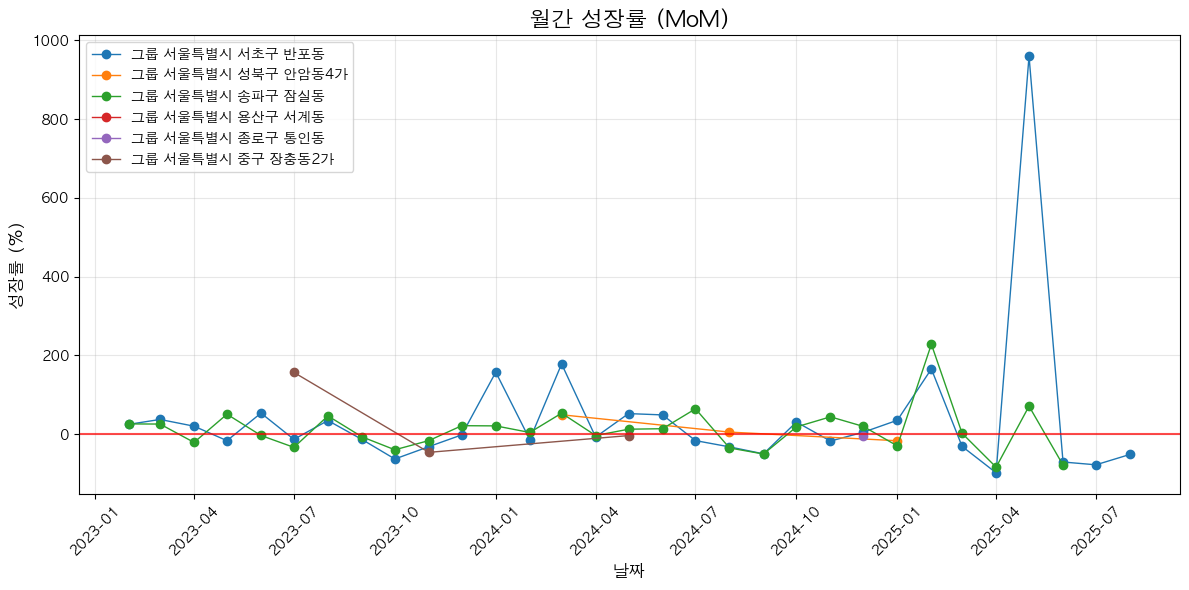

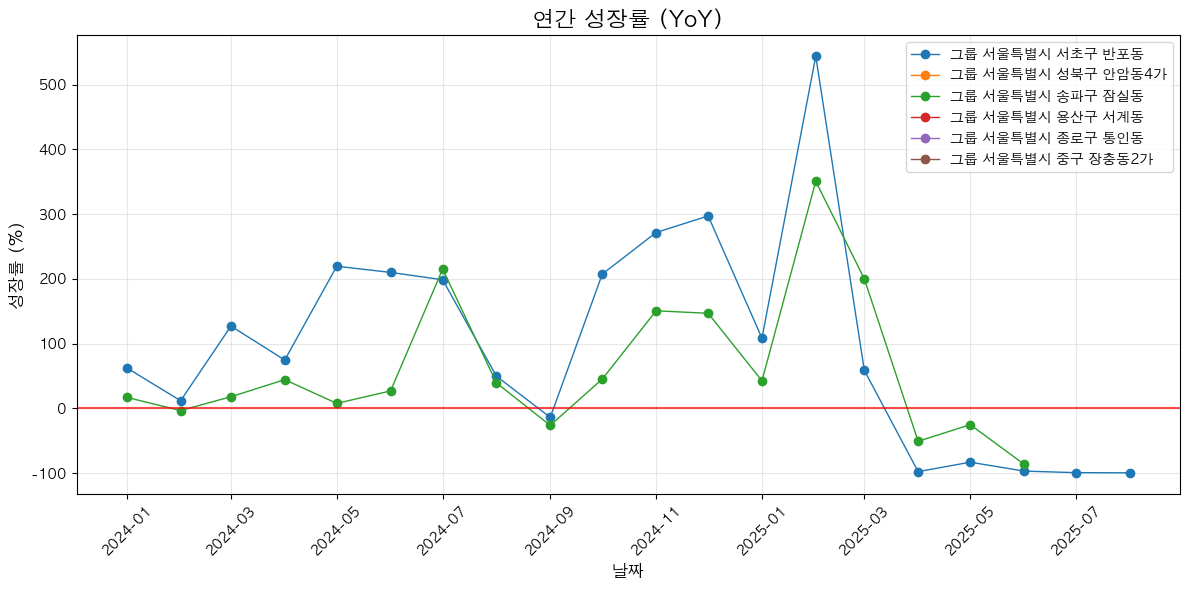


  MoM 성장률 분포는 그룹 분석 시 개별 그림으로 생성되지 않습니다.
=== 성장률 분석 완료 ===

--- '시군구'별 거래금액(만원) 성장률 분석 (상위 5개 그룹) ---

=== 성장률 분석 시작 (거래금액(만원) by 계약날짜) ===

  상위 5개 그룹: ['서울특별시 서초구 반포동', '서울특별시 송파구 잠실동', '서울특별시 서초구 서초동', '서울특별시 서초구 잠원동', '서울특별시 강남구 대치동']
  총 5개 그룹만 시각화합니다.

  최근 12개월 평균 성장률 (시각화된 그룹별):
  그룹 (서울특별시 강남구 대치동): MoM=3.0%, YoY=80.5%
  그룹 (서울특별시 서초구 반포동): MoM=69.6%, YoY=74.9%
  그룹 (서울특별시 서초구 서초동): MoM=4.7%, YoY=87.1%
  그룹 (서울특별시 서초구 잠원동): MoM=9.4%, YoY=104.7%
  그룹 (서울특별시 송파구 잠실동): MoM=14.2%, YoY=90.1%


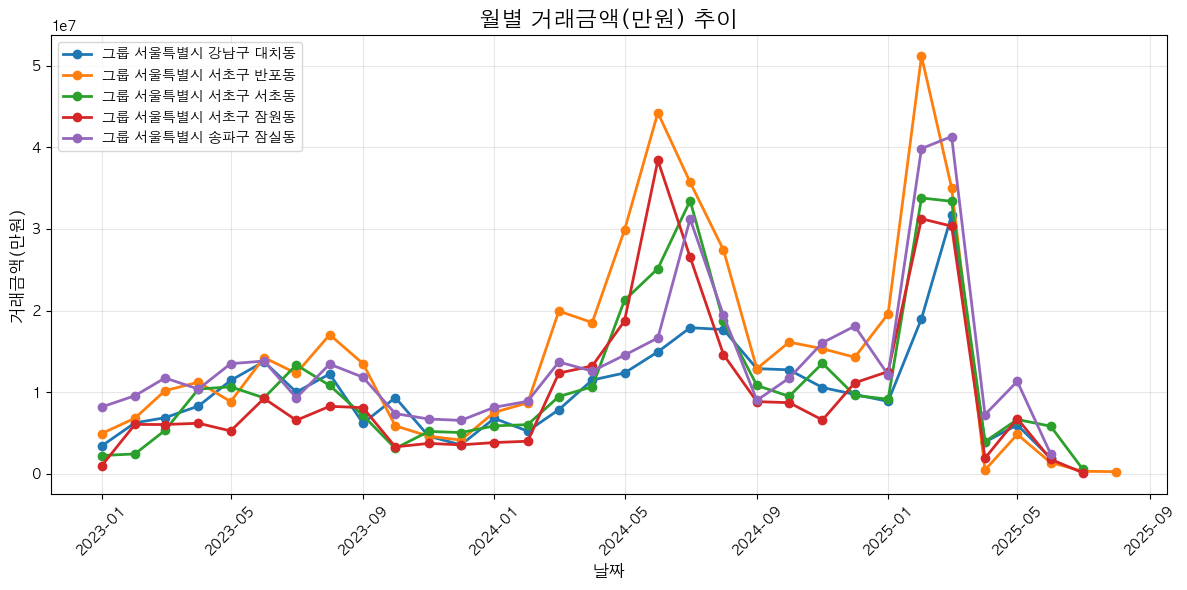

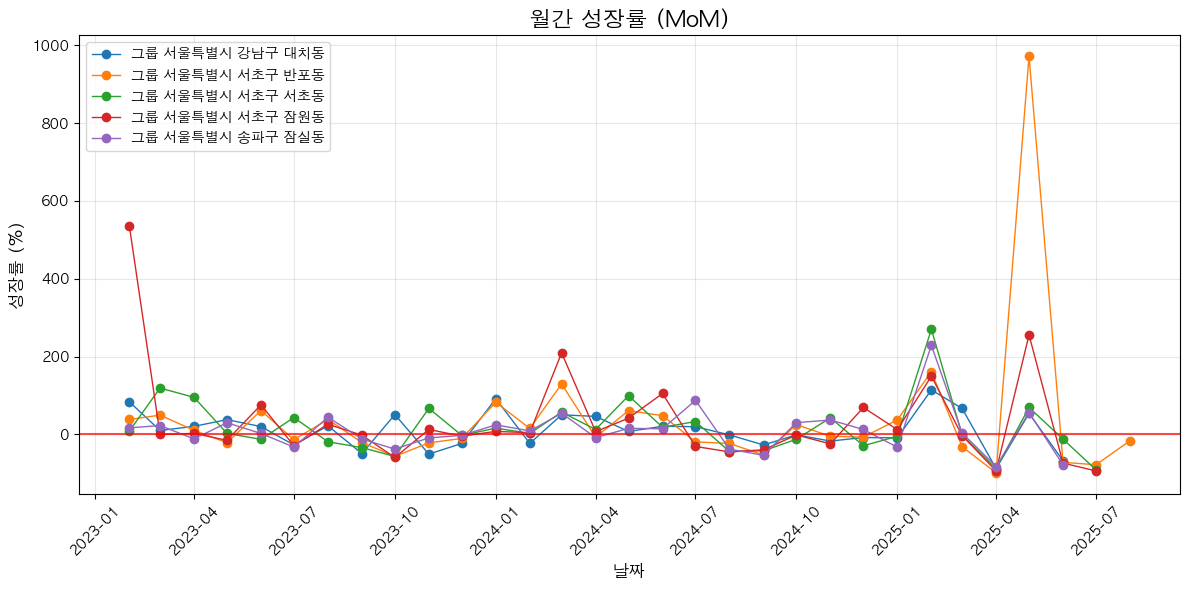

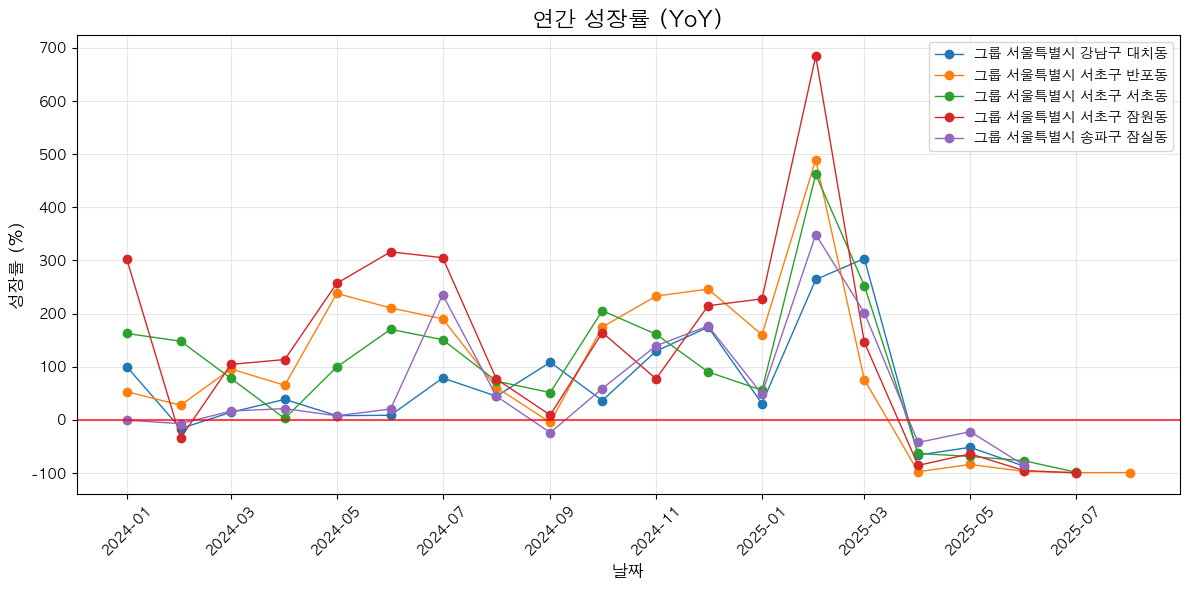


  MoM 성장률 분포는 그룹 분석 시 개별 그림으로 생성되지 않습니다.
=== 성장률 분석 완료 ===
--- 성장률 분석 재검증 완료 ---


In [18]:
# --- TDD 계속: 여섯 번째 기능 재검증 (성장률 분석 - 그룹 필터링 및 개별 플롯) ---

# 코드 블록 14: da_utils/correlation 모듈에서 analyze_growth_rates 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_growth_rates

# 코드 블록 15: analyze_growth_rates 함수 호출 및 결과 검증 (비범용 코드)

# 1. 전체 데이터에 대한 '거래금액(만원)' 성장률 분석 (그룹 필터링 없음)
print("\n--- 전체 거래금액(만원) 성장률 분석 (그룹 필터링 없음) ---")
analyze_growth_rates(
    df=df,
    date_col='계약날짜',
    value_col='거래금액(만원)',
    group_by_cols=None, # 그룹핑 없음
    summary_window=12
)

# 2. '시군구'별 '단위면적당거래금액' 성장률 분석 (상위 3개, 하위 3개 그룹만)
print("\n--- '시군구'별 단위면적당거래금액 성장률 분석 (상위 3개, 하위 3개 그룹) ---")
analyze_growth_rates(
    df=df,
    date_col='계약날짜',
    value_col='단위면적당거래금액',
    group_by_cols=['시군구'], # 시군구별 그룹핑
    summary_window=12,
    num_top_groups=3,     # 상위 3개 그룹
    num_bottom_groups=3   # 하위 3개 그룹
)

# 3. '시군구'별 '거래금액(만원)' 성장률 분석 (상위 5개 그룹만)
print("\n--- '시군구'별 거래금액(만원) 성장률 분석 (상위 5개 그룹) ---")
analyze_growth_rates(
    df=df,
    date_col='계약날짜',
    value_col='거래금액(만원)',
    group_by_cols=['시군구'],
    summary_window=12,
    num_top_groups=5,
    num_bottom_groups=None # 하위 그룹 필터링 없음
)


print("--- 성장률 분석 재검증 완료 ---")

# 결과 검증 (TDD "Green" 단계)
# 이 함수는 시각화와 요약 출력이 주 목적이므로, 생성된 개별 플롯과 출력된 텍스트를 통해 검증합니다.
# 특히 그룹 필터링이 올바르게 적용되었는지, 각 플롯이 별도로 잘 생성되었는지 확인합니다.


--- '거래금액(만원)' 기본 이동 평균 트렌드 분석 ---

=== 이동 평균 트렌드 분석 시작 (거래금액(만원) by 계약날짜) ===

📈 트렌드 방향성 분석 결과:
  최근 7일 이동평균 트렌드: 상승 (66023.47)
  최근 30일 이동평균 트렌드: 하락 (-144096.27)


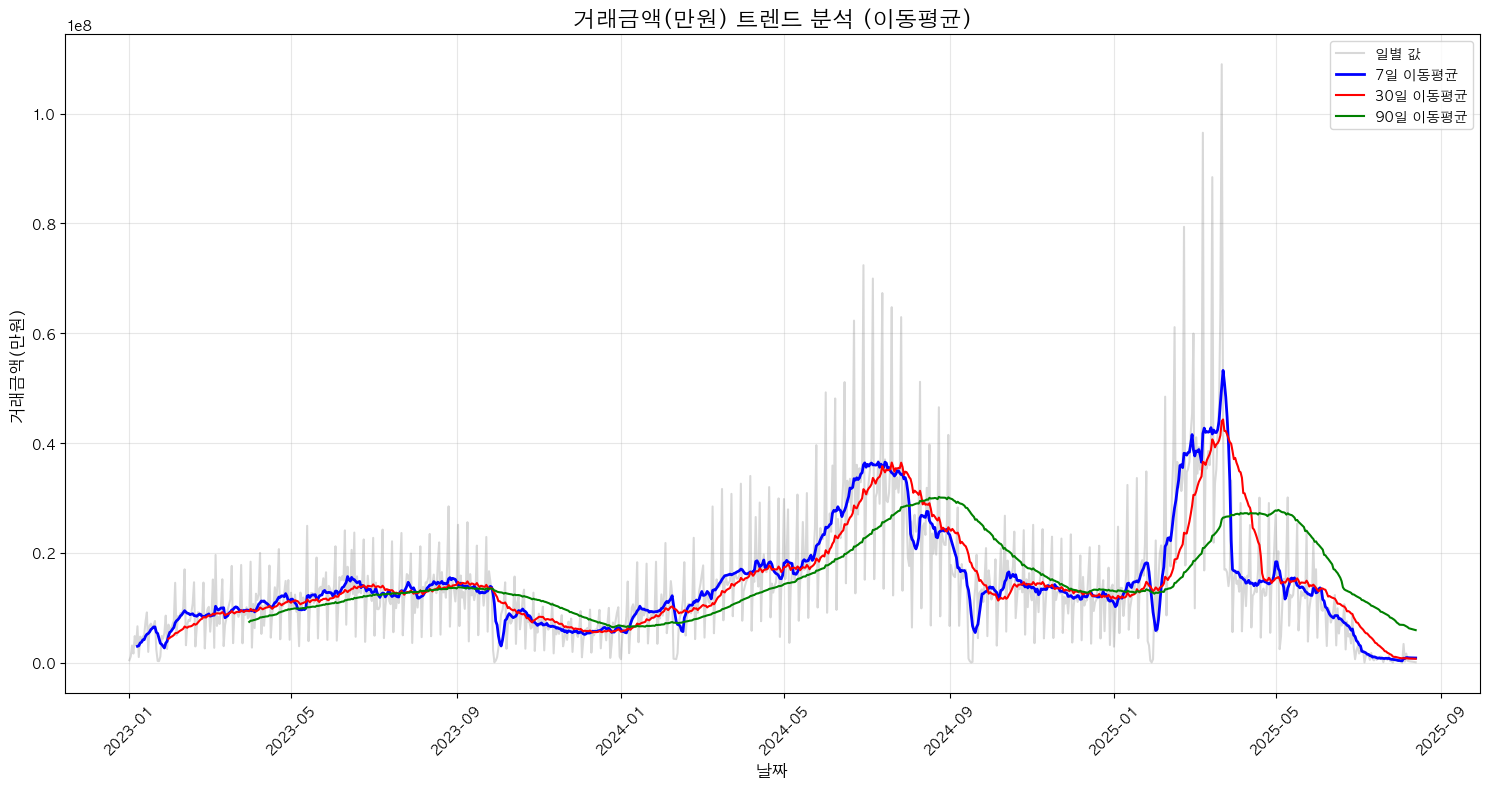

=== 이동 평균 트렌드 분석 완료 ===

--- '단위면적당거래금액' 다른 이동 평균 트렌드 분석 ---

=== 이동 평균 트렌드 분석 시작 (단위면적당거래금액 by 계약날짜) ===

📈 트렌드 방향성 분석 결과:
  최근 14일 이동평균 트렌드: 상승 (391.81)


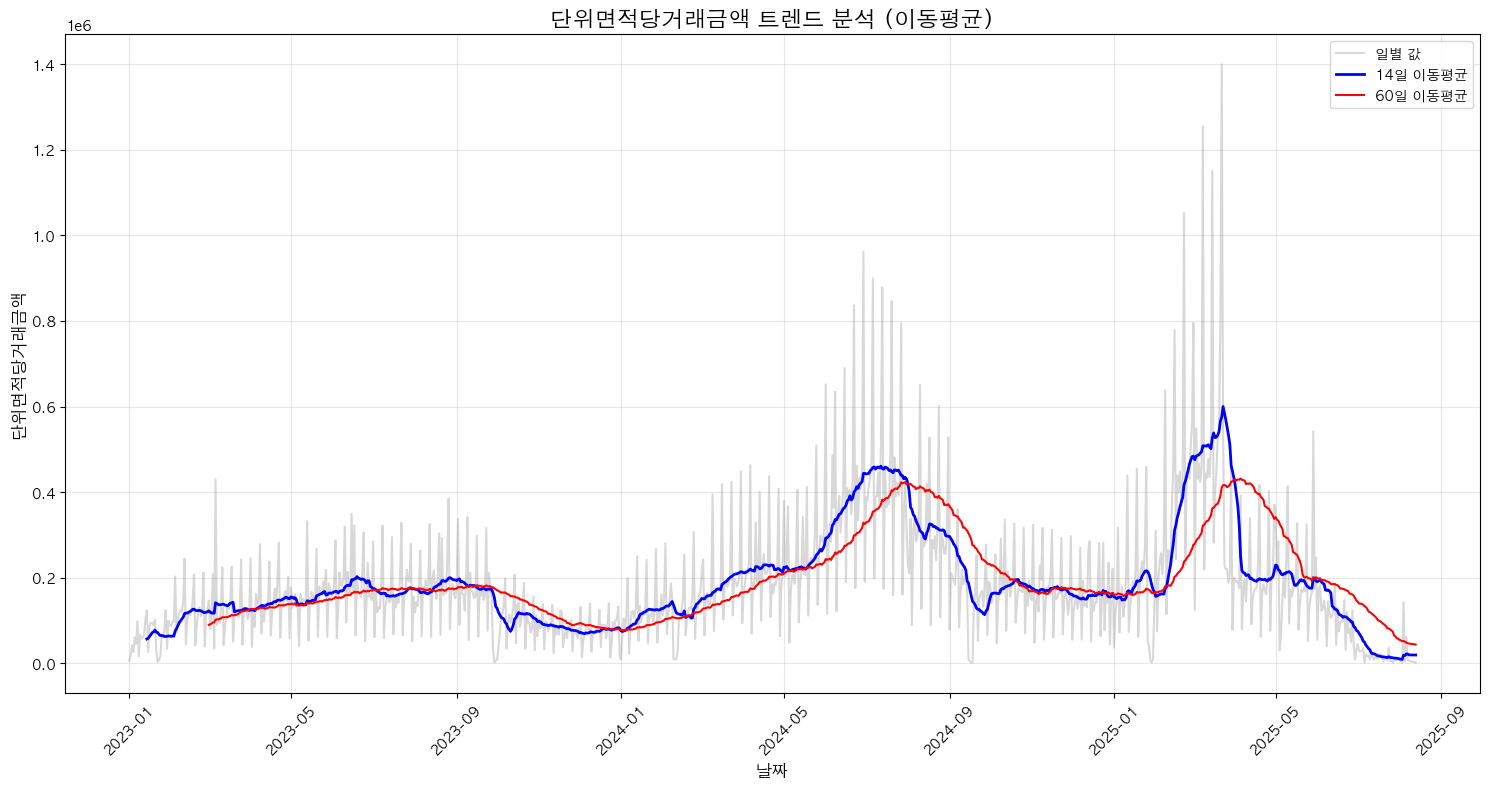

=== 이동 평균 트렌드 분석 완료 ===
--- 이동 평균 트렌드 분석 완료 ---


In [19]:
# trend_corr_analytic.ipynb

# ... (이전 코드 블록: 데이터 로드, 전처리, 한글 폰트 설정, import 2, 파생 변수 생성,
#       analyze_basic_correlations 테스트, analyze_kendall_tau 테스트,
#       analyze_mutual_information 테스트, detect_nonlinear_patterns 테스트,
#       analyze_time_series_trend 테스트, analyze_growth_rates 테스트) ...
# df = df_seoul_10_normal_sales 에 파생변수까지 추가된 상태라고 가정합니다.

# --- TDD 계속: 일곱 번째 기능 검증 (이동 평균 트렌드 분석) ---

# 코드 블록 16: da_utils/correlation 모듈에서 analyze_rolling_trends 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import analyze_rolling_trends

# 코드 블록 17: analyze_rolling_trends 함수 호출 및 결과 검증 (비범용 코드)

# 1. '거래금액(만원)'에 대한 기본 이동 평균 트렌드 분석
print("\n--- '거래금액(만원)' 기본 이동 평균 트렌드 분석 ---")
analyze_rolling_trends(
    df=df,
    date_col='계약날짜',
    value_col='거래금액(만원)',
    rolling_windows=[7, 30, 90], # 주간, 월간, 분기 이동 평균
    trend_summary_windows=[7, 30] # 최근 7일, 30일 트렌드 요약
)

# 2. '단위면적당거래금액'에 대한 다른 이동 평균 트렌드 분석
print("\n--- '단위면적당거래금액' 다른 이동 평균 트렌드 분석 ---")
analyze_rolling_trends(
    df=df,
    date_col='계약날짜',
    value_col='단위면적당거래금액',
    rolling_windows=[14, 60], # 2주, 2개월 이동 평균
    trend_summary_windows=[14] # 최근 14일 트렌드 요약
)

print("--- 이동 평균 트렌드 분석 완료 ---")

# 결과 검증 (TDD "Green" 단계)
# 이 함수는 시각화와 요약 출력이 주 목적이므로, 생성된 플롯과 출력된 텍스트를 통해 검증합니다.
# 특히 이동 평균선들이 잘 그려졌는지, 트렌드 방향성 메시지가 올바른지 확인합니다.


--- 통합 분석을 위한 파라미터 정의 시작 ---
--- 통합 분석을 위한 파라미터 정의 완료 ---

--- 전체 통합 분석 실행 시작 ---
=== 고객 행동 데이터 심층 분석 시작 ===

--- [1] 기본 상관관계 분석 ---
=== 기본 상관관계 분석 시작 ===


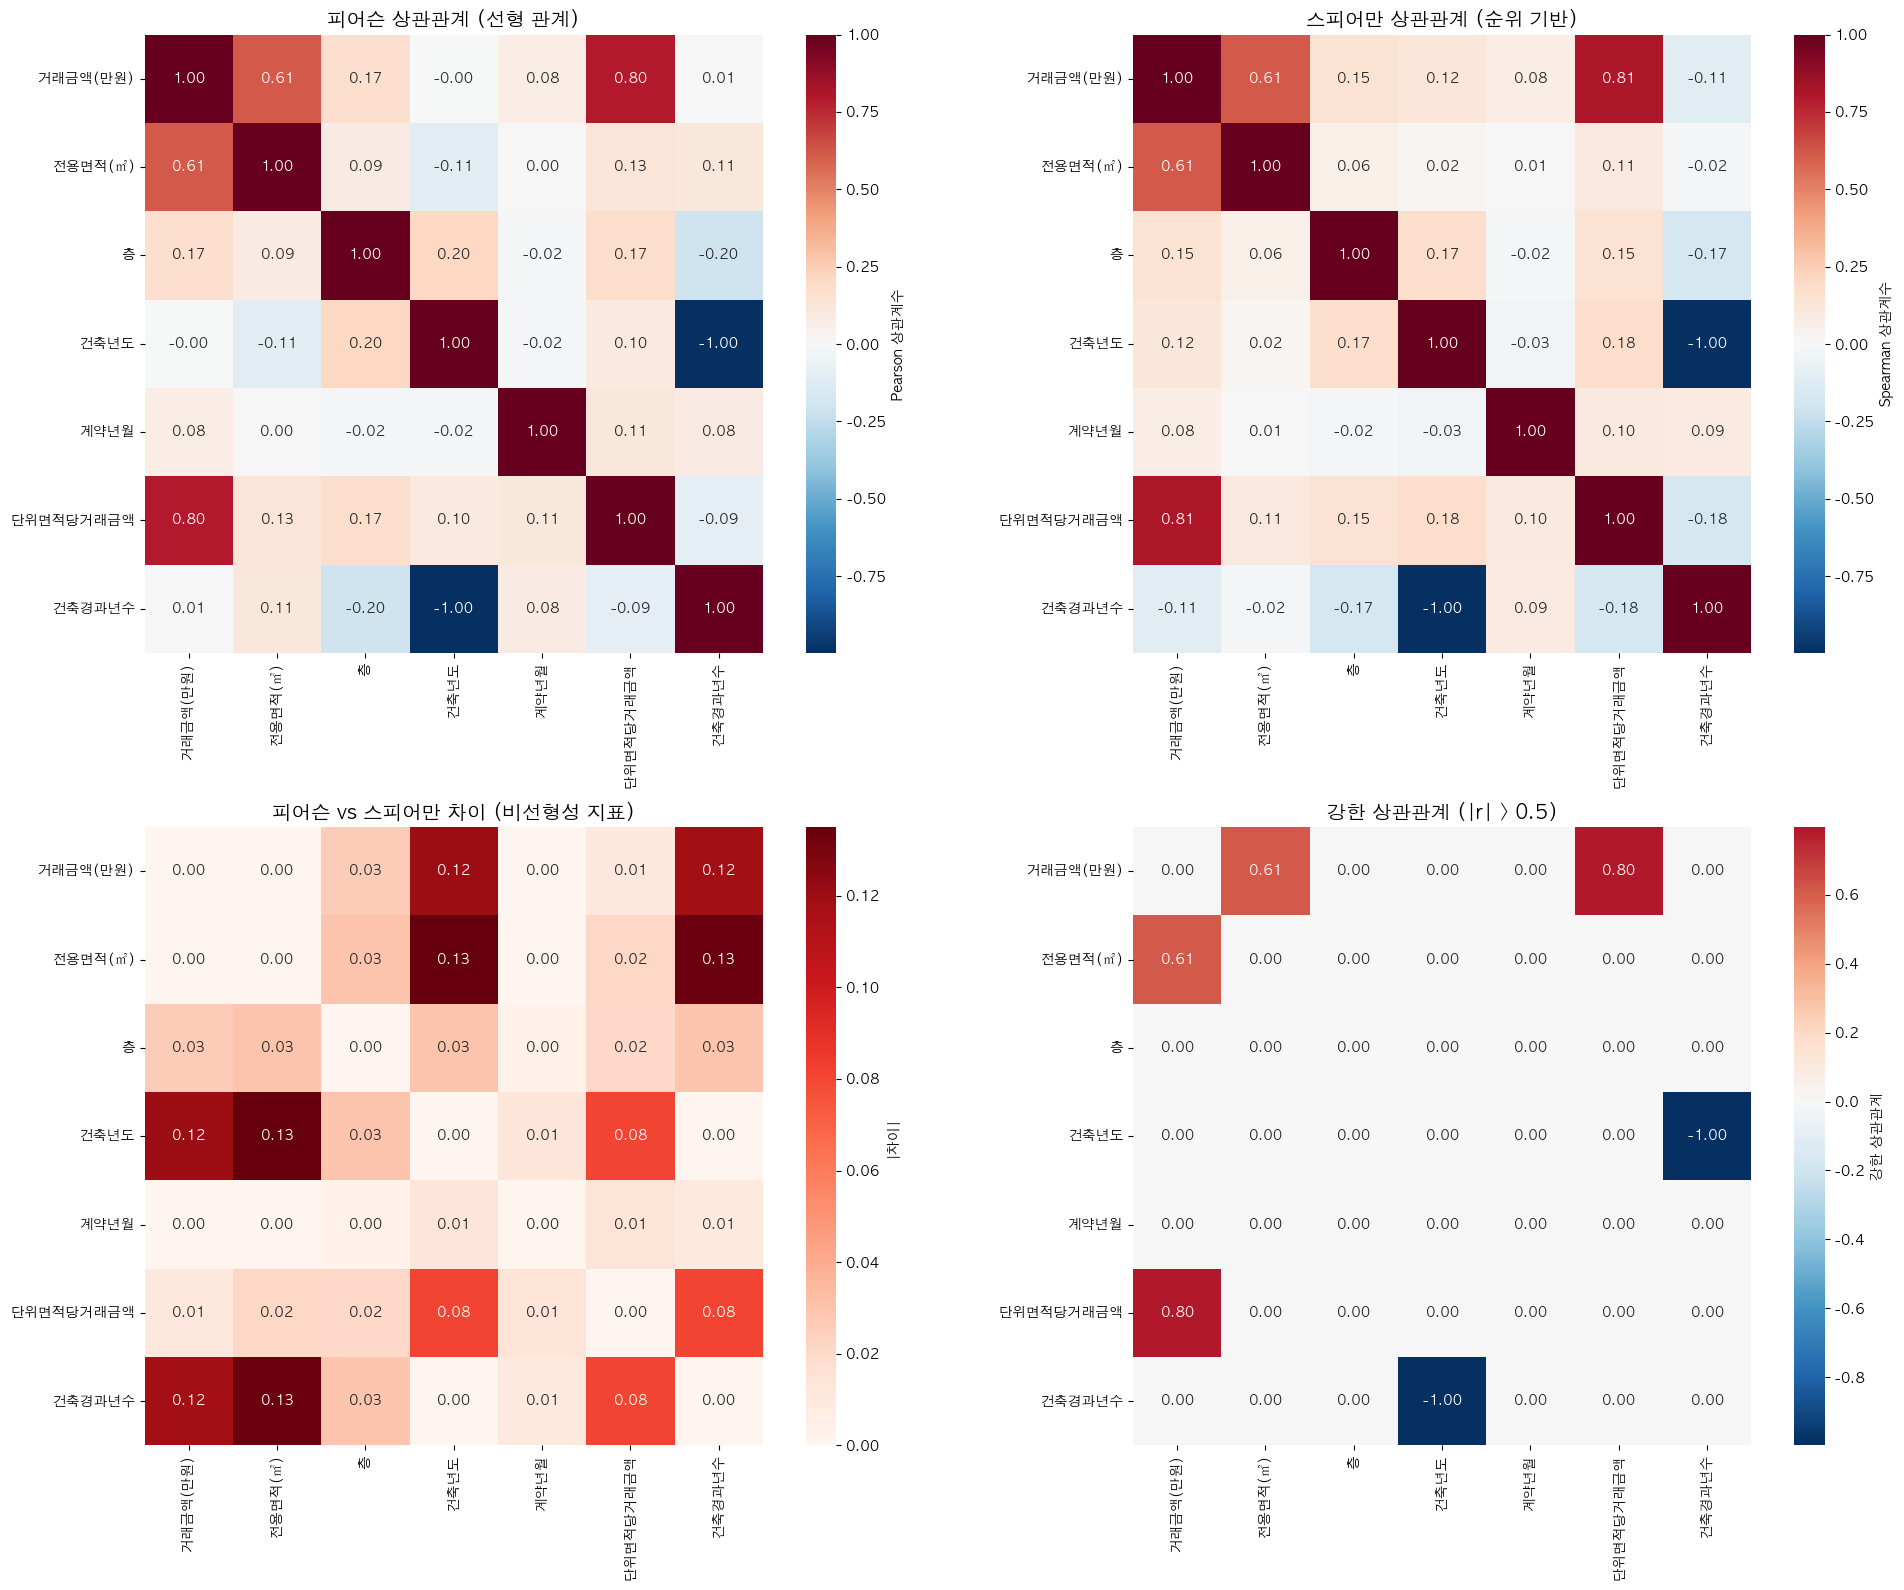

=== 기본 상관관계 분석 완료 ===

--- [2] 고급 상관관계 분석 ---

=== 켄달 타우 상관계수 분석 시작 ===
  유의미한 켄달 타우 상관관계 결과:
    거래금액(만원) vs 전용면적(㎡) = 0.448 (p=0.000)
    거래금액(만원) vs 층 = 0.100 (p=0.000)
    거래금액(만원) vs 단위면적당거래금액 = 0.627 (p=0.000)
    층 vs 건축년도 = 0.122 (p=0.000)
    층 vs 단위면적당거래금액 = 0.105 (p=0.000)
    층 vs 건축경과년수 = -0.122 (p=0.000)
    건축년도 vs 단위면적당거래금액 = 0.125 (p=0.000)
    건축년도 vs 건축경과년수 = -0.975 (p=0.000)
    단위면적당거래금액 vs 건축경과년수 = -0.119 (p=0.000)
=== 켄달 타우 상관계수 분석 완료 ===

=== 상호 정보량 기반 연관성 분석 시작 ===
경고: 다음 Feature 컬럼들이 데이터프레임에 없거나 타겟 컬럼과 동일합니다: ['거래금액(만원)']. 이 컬럼들은 분석에서 제외됩니다.
  (타겟: 거래금액(만원) 기준)
  단위면적당거래금액: 3.206
  전용면적(㎡): 0.786
  건축년도: 0.332
  건축경과년수: 0.283
  층: 0.039
=== 상호 정보량 기반 연관성 분석 완료 ===

--- [3] 비선형 패턴 탐지 ---

=== 비선형 패턴 심화 탐지 시작 ===

  단위면적당거래금액 상위 10% 고객 특성:
  - 평균 전용면적(㎡): 83.5
  - 평균 층: 12.0
  - 평균 건축년도: 2,003.3
  - 시군구 (상위): ['서울특별시 송파구 잠실동', '서울특별시 서초구 반포동', '서울특별시 강남구 개포동'] (비율: [0.11267967145790554, 0.10258384668035592, 0.08273442847364819])


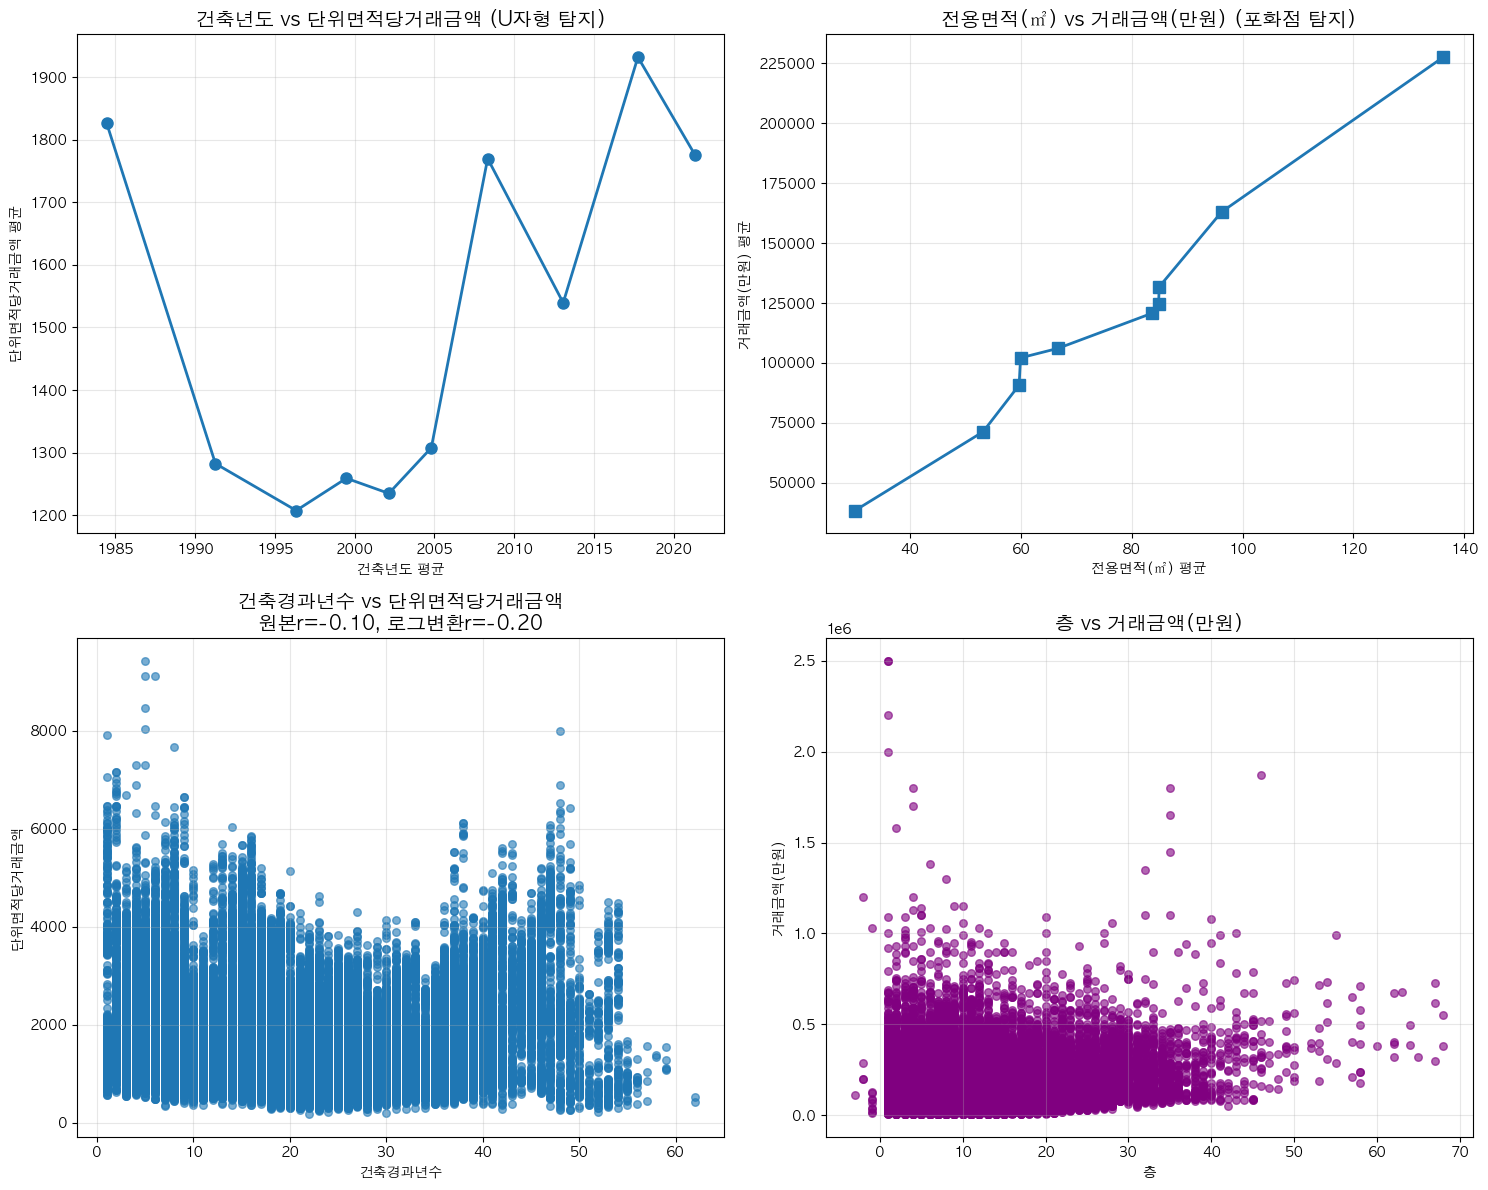

=== 비선형 패턴 심화 탐지 완료 ===

--- [4] 시계열 추세 분석 ---

=== 시계열 추세 분석 시작 (거래금액(만원) by 계약날짜, M 단위) ===


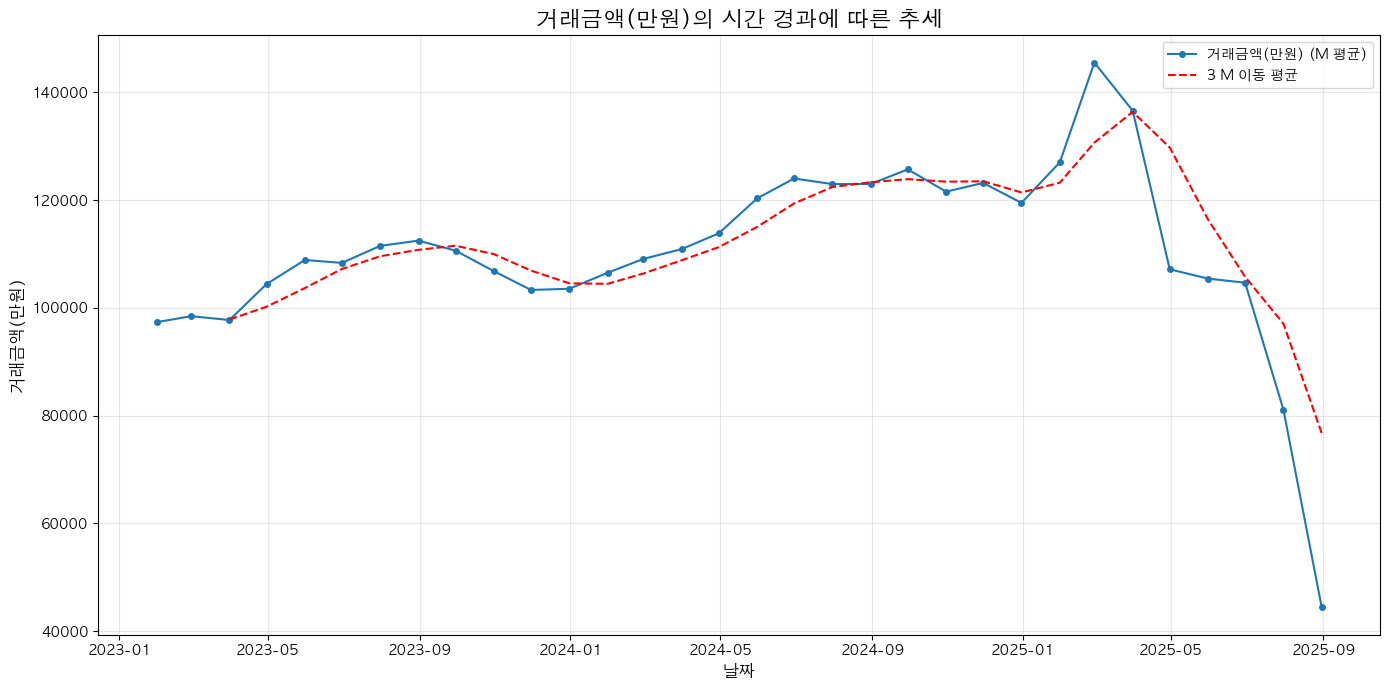

=== 시계열 추세 분석 완료 ===

--- [5] 성장률 분석 ---

=== 성장률 분석 시작 (거래금액(만원) by 계약날짜) ===

  상위 3개 그룹: ['서울특별시 서초구 반포동', '서울특별시 송파구 잠실동', '서울특별시 서초구 서초동']
  하위 3개 그룹: ['서울특별시 중구 장충동2가', '서울특별시 영등포구 당산동6가', '서울특별시 영등포구 영등포동3가']
  총 6개 그룹만 시각화합니다.

  최근 12개월 평균 성장률 (시각화된 그룹별):
  그룹 (서울특별시 서초구 반포동): MoM=69.6%, YoY=74.9%
  그룹 (서울특별시 서초구 서초동): MoM=4.7%, YoY=87.1%
  그룹 (서울특별시 송파구 잠실동): MoM=14.2%, YoY=90.1%
  그룹 (서울특별시 영등포구 당산동6가): MoM=25.0%, YoY=nan%
  그룹 (서울특별시 영등포구 영등포동3가): MoM=6.4%, YoY=nan%
  그룹 (서울특별시 중구 장충동2가): MoM=7.5%, YoY=nan%


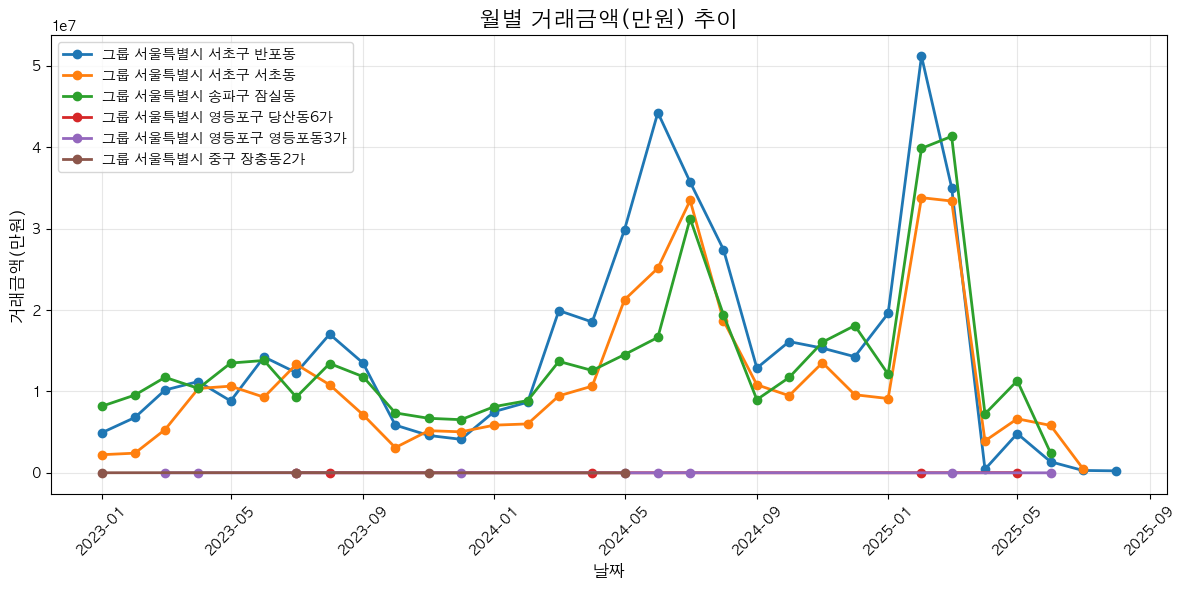

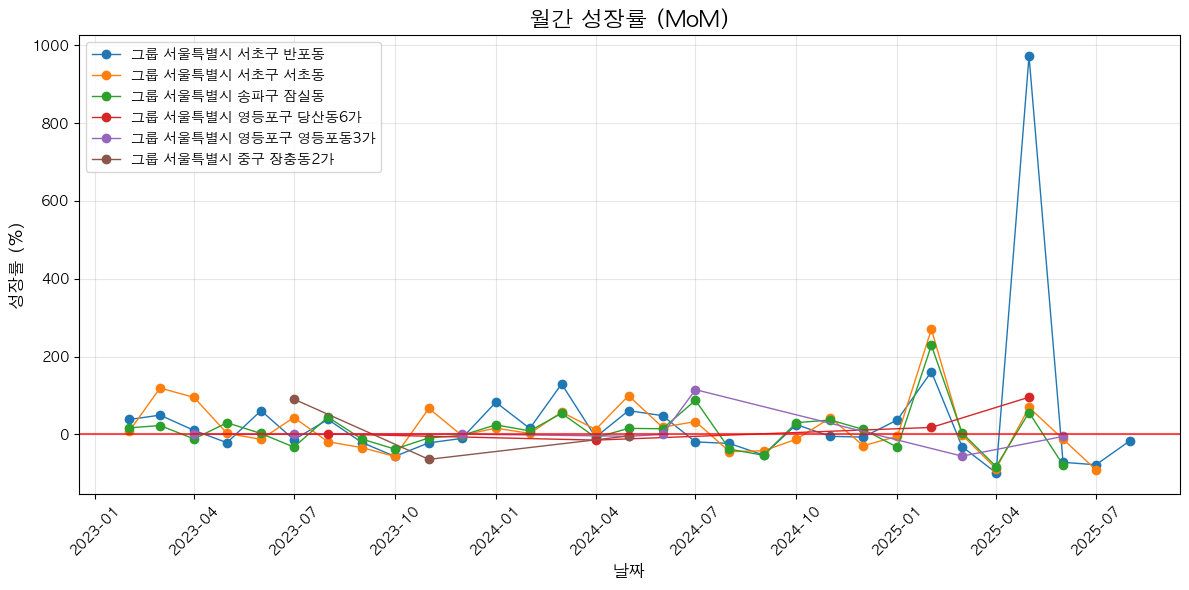

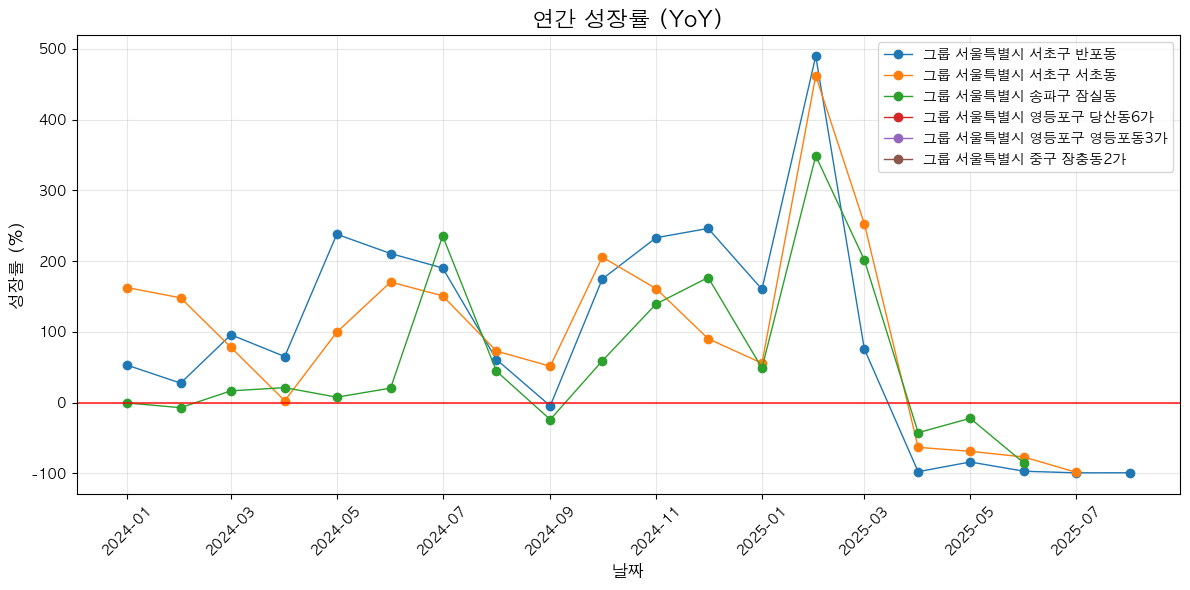


  MoM 성장률 분포는 그룹 분석 시 개별 그림으로 생성되지 않습니다.
=== 성장률 분석 완료 ===

--- [6] 이동 평균 트렌드 분석 ---

=== 이동 평균 트렌드 분석 시작 (거래금액(만원) by 계약날짜) ===

📈 트렌드 방향성 분석 결과:
  최근 7일 이동평균 트렌드: 상승 (66023.47)
  최근 30일 이동평균 트렌드: 하락 (-144096.27)


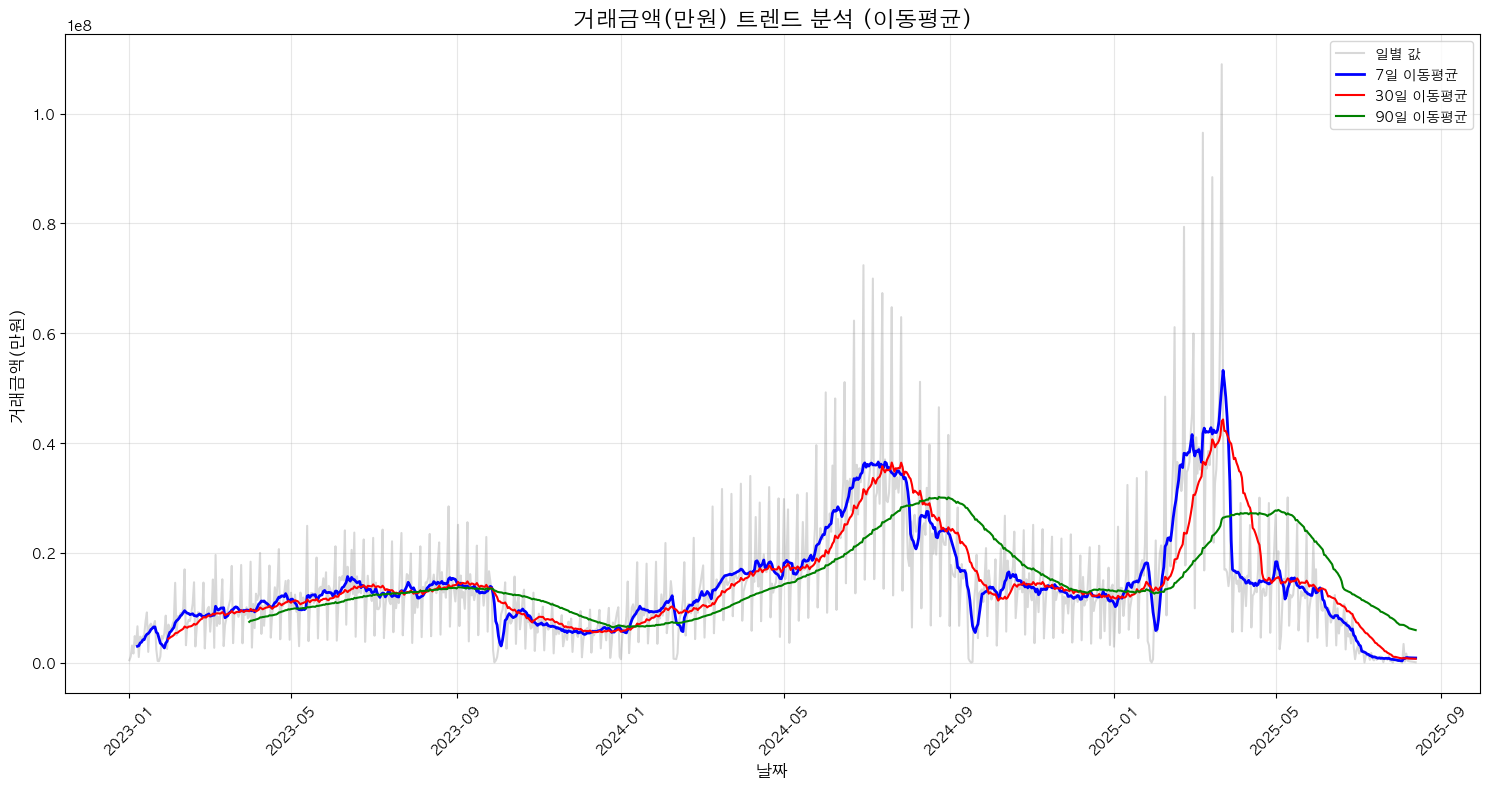

=== 이동 평균 트렌드 분석 완료 ===

=== 고객 행동 데이터 심층 분석 완료 ===

--- 전체 통합 분석 실행 완료 ---


In [20]:
# trend_corr_analytic.ipynb

# ... (이전 코드 블록: 데이터 로드, 전처리, 한글 폰트 설정, import 2, 파생 변수 생성,
#       analyze_basic_correlations 테스트, analyze_kendall_tau 테스트,
#       analyze_mutual_information 테스트, detect_nonlinear_patterns 테스트,
#       analyze_time_series_trend 테스트, analyze_growth_rates 테스트,
#       analyze_rolling_trends 테스트) ...
# df = df_seoul_10_normal_sales 에 파생변수까지 추가된 상태라고 가정합니다.

# --- TDD 최종 단계: 통합 실행 함수 검증 ---

# 코드 블록 18: da_utils/correlation 모듈에서 run_full_correlation_analysis 함수 임포트
# (범용 함수 사용)
from da_utils.correlation import run_full_correlation_analysis

# 코드 블록 19: 각 분석 모듈에 필요한 파라미터 딕셔너리 정의 (비범용 코드)
# df_seoul_10_normal_sales 데이터에 특화된 컬럼명 및 설정
print("\n--- 통합 분석을 위한 파라미터 정의 시작 ---")

# [1] 기본 상관관계 분석 파라미터
basic_corr_params = {
    'numeric_cols': ['거래금액(만원)', '전용면적(㎡)', '층', '건축년도', '계약년월',
                     '단위면적당거래금액', '건축경과년수'],
    'strong_corr_threshold': 0.5
}

# [2] 고급 상관관계 분석 파라미터
advanced_corr_params = {
    'key_vars': ['거래금액(만원)', '전용면적(㎡)', '층', '건축년도',
                 '단위면적당거래금액', '건축경과년수'],
    'mi_target_col': '거래금액(만원)',
    'kendall_p_value_threshold': 0.05,
    'kendall_tau_threshold': 0.1
}

# [3] 비선형 패턴 탐지 파라미터
nonlinear_patterns_params = {
    'u_shape_x_col': '건축년도',
    'u_shape_y_col': '단위면적당거래금액',
    'saturation_x_col': '전용면적(㎡)',
    'saturation_y_col': '거래금액(만원)',
    'exponential_x_col': '건축경과년수',
    'exponential_y_col': '단위면적당거래금액',
    'scatter_x_col': '층',
    'scatter_y_col': '거래금액(만원)',
    'high_value_segment_col': '단위면적당거래금액',
    'high_value_analysis_cols': ['전용면적(㎡)', '층', '건축년도', '시군구'],
    'q_segments': 10,
    'quantile_threshold': 0.9
}

# [4] 시계열 추세 분석 파라미터
time_series_trend_params = {
    'date_col': '계약날짜',
    'value_col': '거래금액(만원)',
    'resample_freq': 'M',
    'rolling_window': 3
}

# [5] 성장률 분석 파라미터
growth_rates_params = {
    'date_col': '계약날짜',
    'value_col': '거래금액(만원)',
    'group_by_cols': ['시군구'], # 시군구별 분석 예시
    'summary_window': 12,
    'num_top_groups': 3,
    'num_bottom_groups': 3
}

# [6] 이동 평균 트렌드 분석 파라미터
rolling_trends_params = {
    'date_col': '계약날짜',
    'value_col': '거래금액(만원)',
    'rolling_windows': [7, 30, 90],
    'trend_summary_windows': [7, 30]
}

print("--- 통합 분석을 위한 파라미터 정의 완료 ---")

# 코드 블록 20: run_full_correlation_analysis 함수 호출
print("\n--- 전체 통합 분석 실행 시작 ---")
run_full_correlation_analysis(
    df=df,
    basic_corr_params=basic_corr_params,
    advanced_corr_params=advanced_corr_params,
    nonlinear_patterns_params=nonlinear_patterns_params,
    time_series_trend_params=time_series_trend_params,
    growth_rates_params=growth_rates_params,
    rolling_trends_params=rolling_trends_params
)
print("\n--- 전체 통합 분석 실행 완료 ---")

# 결과 검증 (TDD "Green" 단계)
# 모든 개별 분석 함수가 성공적으로 실행되고, 예상되는 시각화와 출력 메시지가 나타나는지 확인합니다.
# 오류 메시지 없이 모든 분석이 완료되면 성공입니다.